# Setting up libraries and initial data cleaning

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
!head -n 1 data.csv

Q1A	Q1I	Q1E	Q2A	Q2I	Q2E	Q3A	Q3I	Q3E	Q4A	Q4I	Q4E	Q5A	Q5I	Q5E	Q6A	Q6I	Q6E	Q7A	Q7I	Q7E	Q8A	Q8I	Q8E	Q9A	Q9I	Q9E	Q10A	Q10I	Q10E	Q11A	Q11I	Q11E	Q12A	Q12I	Q12E	Q13A	Q13I	Q13E	Q14A	Q14I	Q14E	Q15A	Q15I	Q15E	Q16A	Q16I	Q16E	Q17A	Q17I	Q17E	Q18A	Q18I	Q18E	Q19A	Q19I	Q19E	Q20A	Q20I	Q20E	Q21A	Q21I	Q21E	Q22A	Q22I	Q22E	Q23A	Q23I	Q23E	Q24A	Q24I	Q24E	Q25A	Q25I	Q25E	Q26A	Q26I	Q26E	Q27A	Q27I	Q27E	Q28A	Q28I	Q28E	Q29A	Q29I	Q29E	Q30A	Q30I	Q30E	Q31A	Q31I	Q31E	Q32A	Q32I	Q32E	Q33A	Q33I	Q33E	Q34A	Q34I	Q34E	Q35A	Q35I	Q35E	Q36A	Q36I	Q36E	Q37A	Q37I	Q37E	Q38A	Q38I	Q38E	Q39A	Q39I	Q39E	Q40A	Q40I	Q40E	Q41A	Q41I	Q41E	Q42A	Q42I	Q42E	country	source	introelapse	testelapse	surveyelapse	TIPI1	TIPI2	TIPI3	TIPI4	TIPI5	TIPI6	TIPI7	TIPI8	TIPI9	TIPI10	VCL1	VCL2	VCL3	VCL4	VCL5	VCL6	VCL7	VCL8	VCL9	VCL10	VCL11	VCL12	VCL13	VCL14	VCL15	VCL16	education	urban	gender	engnat	age	screensize	uniquenetworklocation	hand	religion	orientation	race	voted	married	familysize	major


http://www2.psy.unsw.edu.au/dass/

In [3]:
df = pd.read_csv('data.csv', delimiter='\t')

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 172 columns):
 #    Column                 Dtype 
---   ------                 ----- 
 0    Q1A                    int64 
 1    Q1I                    int64 
 2    Q1E                    int64 
 3    Q2A                    int64 
 4    Q2I                    int64 
 5    Q2E                    int64 
 6    Q3A                    int64 
 7    Q3I                    int64 
 8    Q3E                    int64 
 9    Q4A                    int64 
 10   Q4I                    int64 
 11   Q4E                    int64 
 12   Q5A                    int64 
 13   Q5I                    int64 
 14   Q5E                    int64 
 15   Q6A                    int64 
 16   Q6I                    int64 
 17   Q6E                    int64 
 18   Q7A                    int64 
 19   Q7I                    int64 
 20   Q7E                    int64 
 21   Q8A                    int64 
 22   Q8I                 

In [5]:
np.unique(df.isna(), return_counts=True)

(array([False,  True]), array([6829895,   11405]))

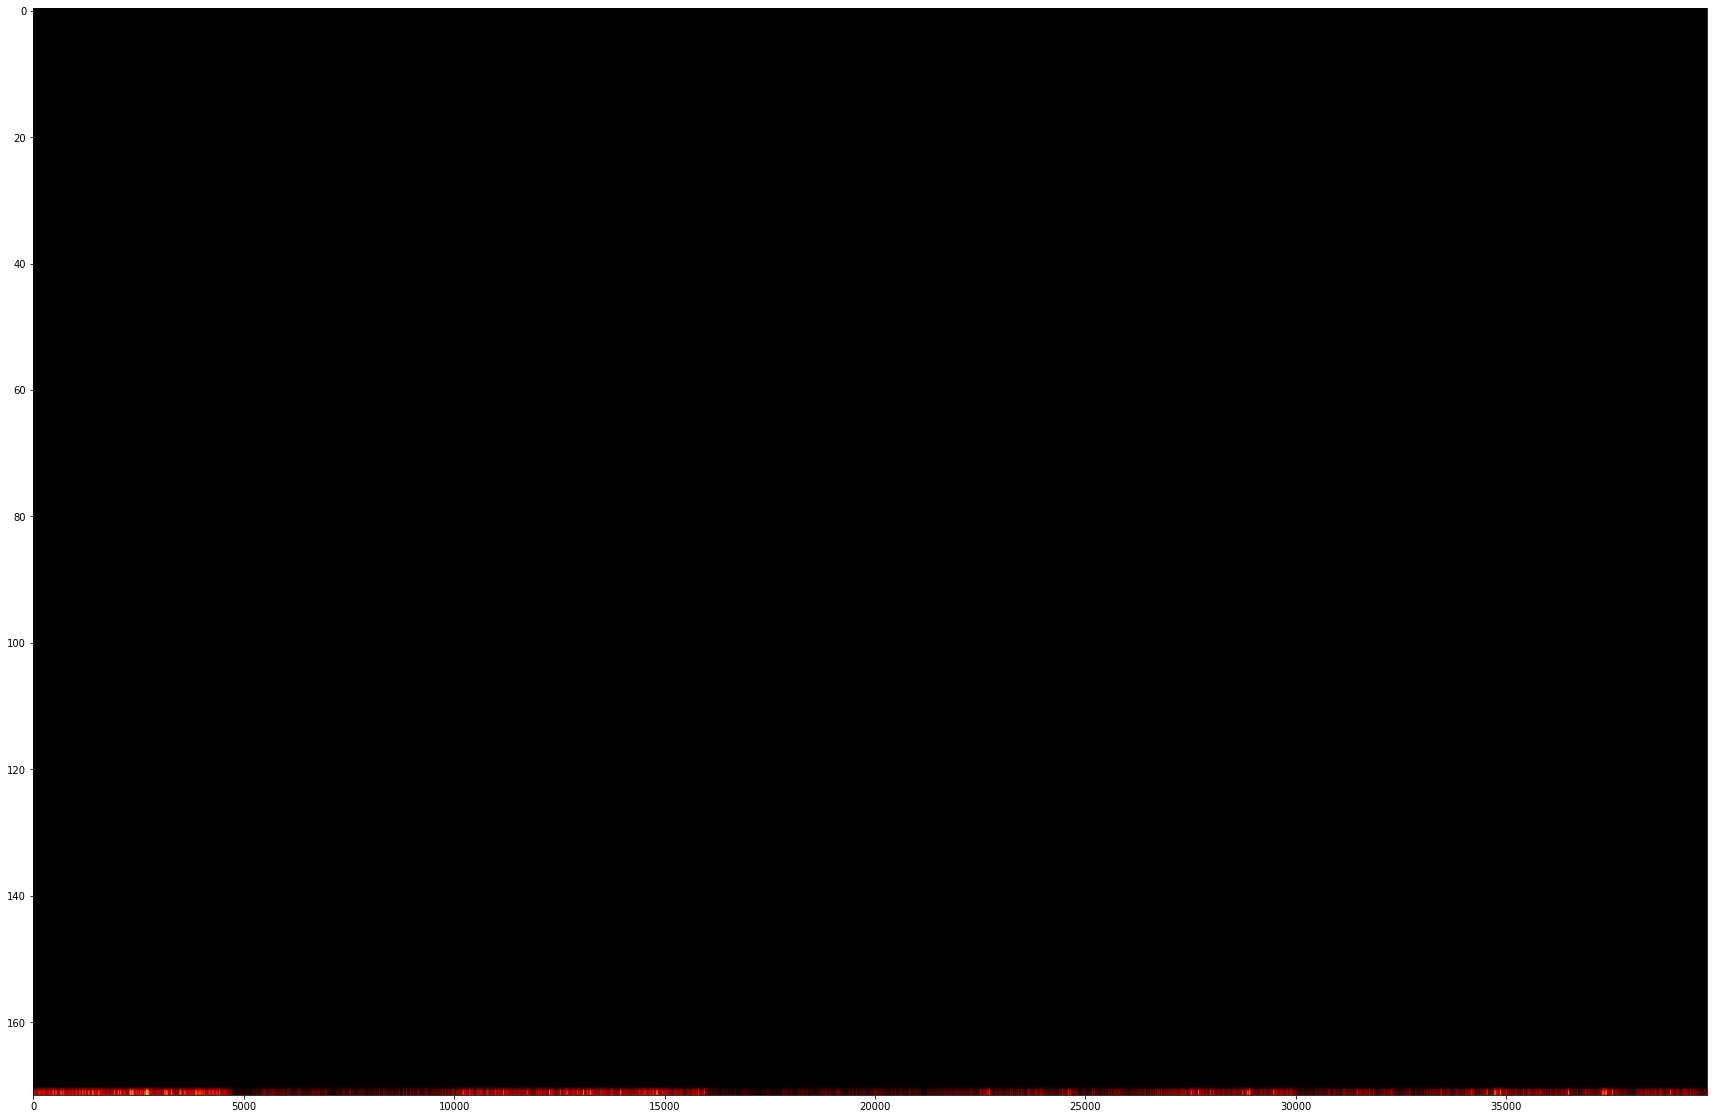

In [6]:
plt.figure(figsize=(30, 20))
plt.imshow(df.isna().T,cmap='gist_heat', aspect='auto')

In [7]:
df['major'].fillna('None', inplace=True)

In [8]:
np.unique(np.unique(df['major'], return_counts=True)[1])

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    53,    54,    57,    58,    59,    65,
          66,    68,    69,    71,    72,    73,    74,    75,    76,
          77,    79,    81,    82,    96,    98,   101,   102,   105,
         106,   117,   122,   133,   135,   137,   143,   156,   157,
         159,   163,   164,   166,   167,   169,   179,   184,   186,
         188,   195,   202,   204,   208,   214,   261,   275,   276,
         312,   316,   320,   348,   524,   580,   582,   607,   621,
         850,  1026, 11425])

In [9]:
q_answers = df[df.columns[0:126:3]]
q_time = df[df.columns[2:128:3]]
q_order = df[df.columns[1:127:3]]

<AxesSubplot:>

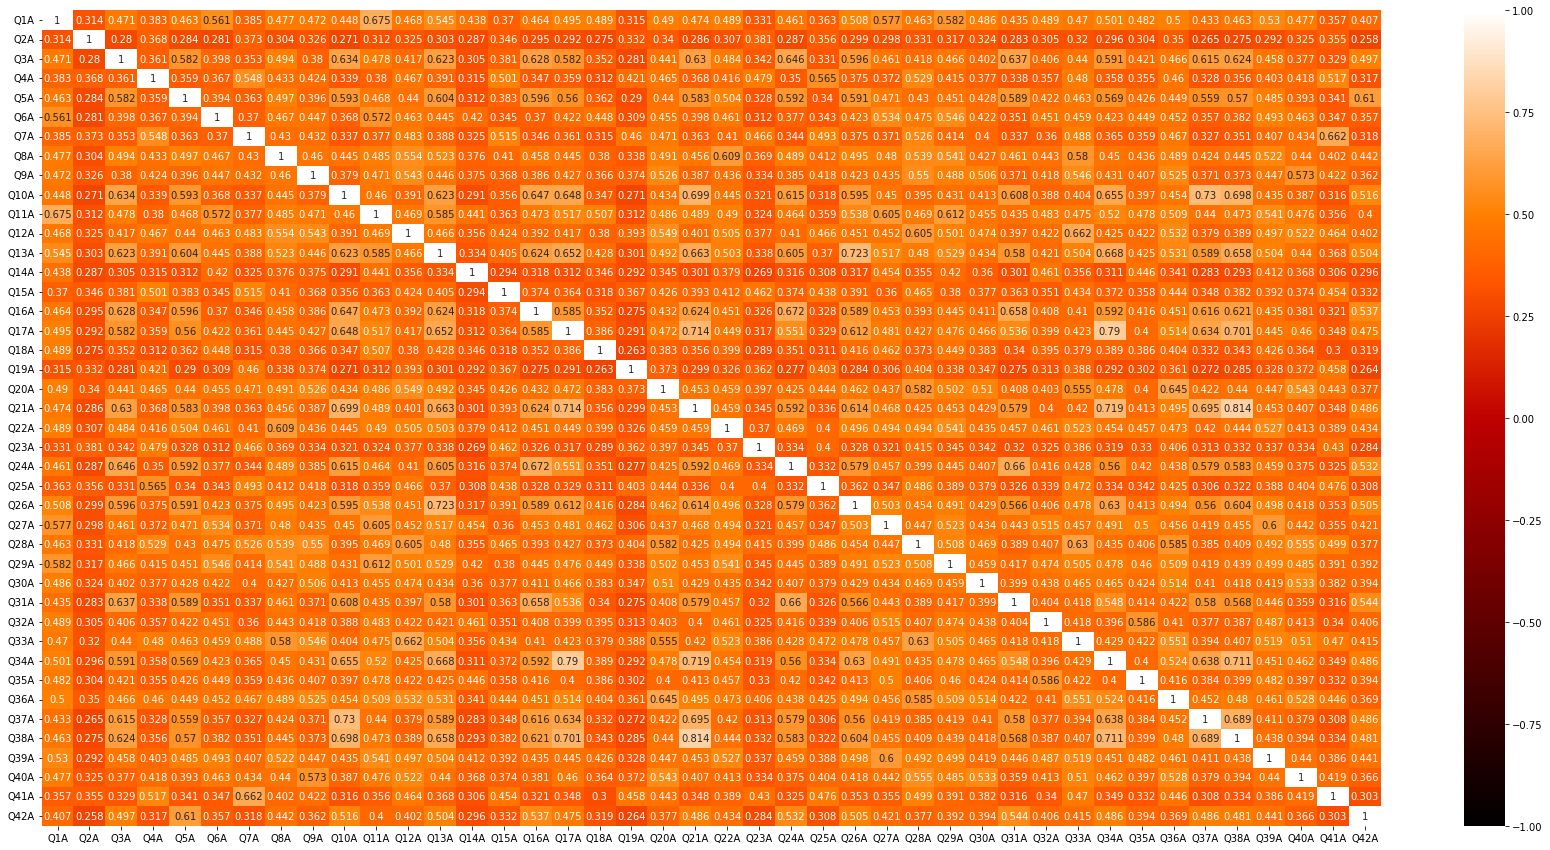

In [10]:
plt.figure(figsize=(30,15))
sns.heatmap(q_answers.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

https://neurocogsystem.com/wp-content/uploads/2021/02/DASS-42-Scoring.pdf

https://www.psytoolkit.org/survey-library/depression-anxiety-stress-dass.html

In [11]:
depr = [2, 4, 9, 12, 15, 16, 20, 23, 25, 30, 33, 36, 37, 41]
anx = [1, 3, 6, 8, 14, 18, 19, 22, 24, 27, 29, 35, 39, 40]
strss = [0, 5, 7, 10, 11, 13, 17, 21, 26, 28, 31, 32, 34, 38]

<AxesSubplot:>

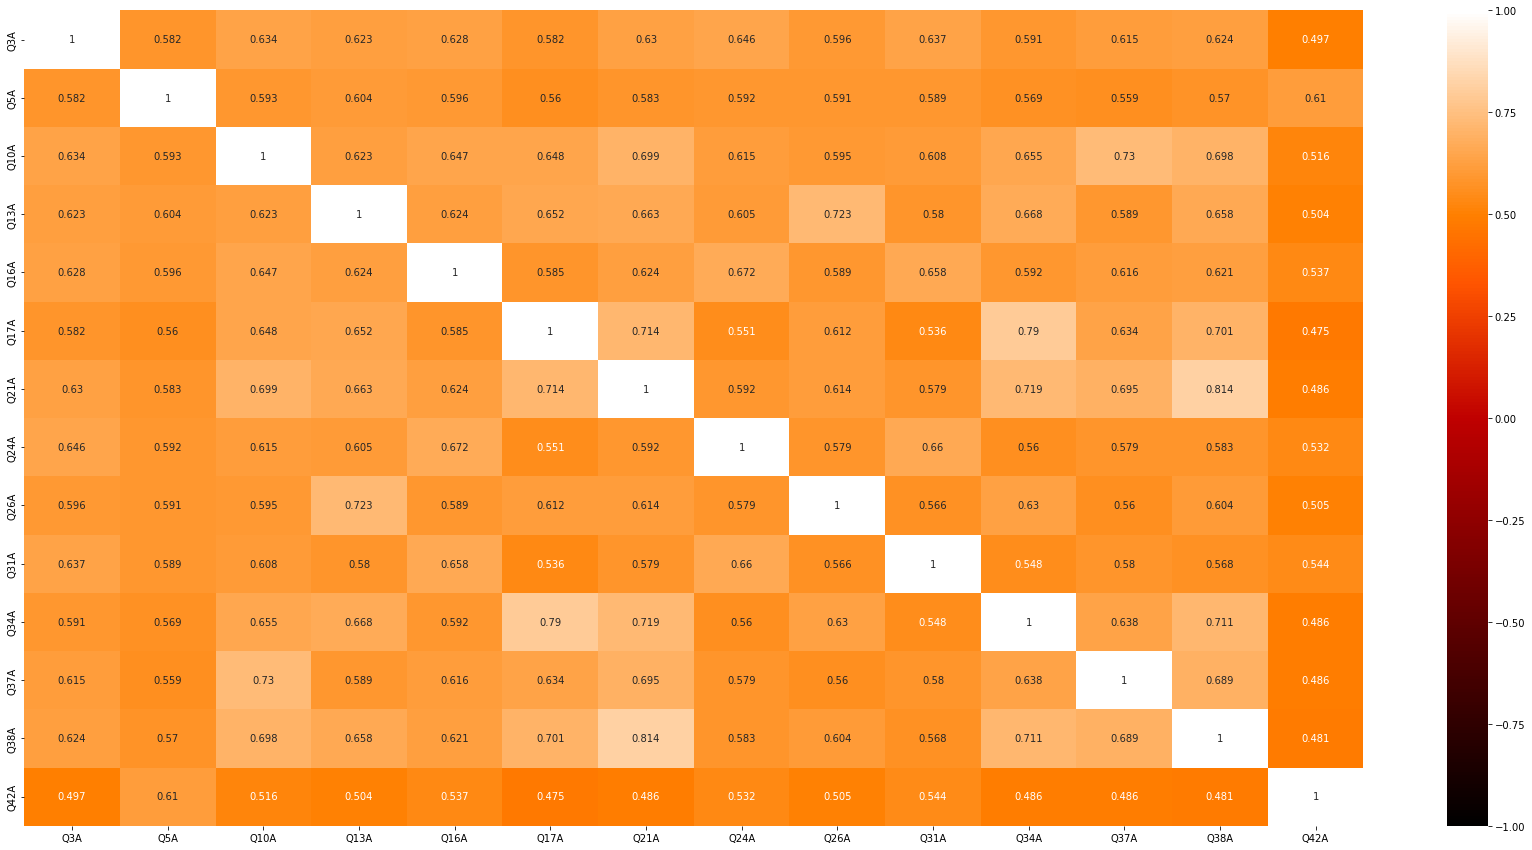

In [12]:
plt.figure(figsize=(30,15))
sns.heatmap(q_answers[q_answers.columns[depr]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

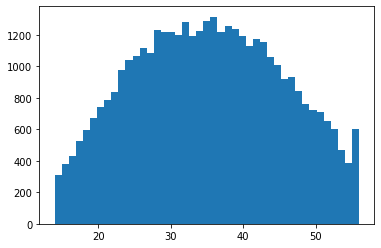

In [13]:
_ = plt.hist(np.sum(q_answers[q_answers.columns[strss]], axis=1), bins=43)

## Idea - calculate DASS scores and then check how do they relate to the features as in age, sex, education etc...

In [14]:
q_answers = q_answers - 1

In [15]:
LVL_Ssum = np.sum(q_answers[q_answers.columns[strss]], axis=1)
LVL_Asum = np.sum(q_answers[q_answers.columns[anx]], axis=1)
LVL_Dsum = np.sum(q_answers[q_answers.columns[depr]], axis=1)
LVL_S = LVL_Ssum.copy()
LVL_A = LVL_Asum.copy()
LVL_D = LVL_Dsum.copy()

In [16]:
LVL_S[(LVL_Ssum >= 0) & (LVL_Ssum <= 9)] = 0
LVL_S[(LVL_Ssum >= 10) & (LVL_Ssum <= 13)] = 1
LVL_S[(LVL_Ssum >= 14) & (LVL_Ssum <= 20)] = 2
LVL_S[(LVL_Ssum >= 21) & (LVL_Ssum <= 27)] = 3
LVL_S[(LVL_Ssum >= 28)] = 4

In [17]:
LVL_A[(LVL_Asum >= 0) & (LVL_Asum <= 7)] = 0
LVL_A[(LVL_Asum >= 8) & (LVL_Asum <= 9)] = 1
LVL_A[(LVL_Asum >= 10) & (LVL_Asum <= 14)] = 2
LVL_A[(LVL_Asum >= 15) & (LVL_Asum <= 19)] = 3
LVL_A[(LVL_Asum >= 20)] = 4

In [18]:
LVL_D[(LVL_Dsum >= 0) & (LVL_Dsum <= 14)] = 0
LVL_D[(LVL_Dsum >= 15) & (LVL_Dsum <= 18)] = 1
LVL_D[(LVL_Dsum >= 19) & (LVL_Dsum <= 25)] = 2
LVL_D[(LVL_Dsum >= 26) & (LVL_Dsum <= 33)] = 3
LVL_D[(LVL_Dsum >= 34)] = 4

In [19]:
LVL_S.name = "LVL_S"
LVL_A.name = "LVL_A"
LVL_D.name = "LVL_D"
LVL_Ssum.name = "LVL_Ssum"
LVL_Asum.name = "LVL_Asum"
LVL_Dsum.name = "LVL_Dsum"

In [238]:
df.head(5)

Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  ...  religion  \
0    4   28  3890    4   25  2122    2   16  1944    4  ...        12   
1    4    2  8118    1   36  2890    2   35  4777    3  ...         7   
2    3    7  5784    1   33  4373    4   41  3242    1  ...         4   
3    2   23  5081    3   11  6837    2   37  5521    1  ...         4   
4    2   36  3215    2   13  7731    3    5  4156    4  ...        10   

   orientation  race  voted  married  familysize       major  LVL_S  LVL_A  \
0            1    10      2        1           2        None      4      4   
1            0    70      2        1           4        None      3      3   
2            3    60      1        1           3        None      2      2   
3            5    70      2        1           5     biology      2      3   
4            1    10      2        1           4  Psychology      4      4   

   LVL_D  
0      3  
1      2  
2      4  
3      1  
4      3  

[5 rows x 175 columns]

In [21]:
#plt.figure(figsize=(16,9))
df = df.join(LVL_S).join(LVL_A).join(LVL_D)#.join(LVL_Ssum).join(LVL_Asum).join(LVL_Dsum)

In [22]:
features_df = df[df.columns[128:]].copy()

In [23]:
features_df[features_df.columns[29:]].head(5)

education  urban  gender  engnat  age  screensize  uniquenetworklocation  \
0          2      3       2       2   16           1                      1   
1          2      3       2       1   16           2                      1   
2          2      3       2       2   17           2                      1   
3          1      3       2       1   13           2                      1   
4          3      2       2       2   19           2                      2   

   hand  religion  orientation  race  voted  married  familysize       major  \
0     1        12            1    10      2        1           2        None   
1     2         7            0    70      2        1           4        None   
2     1         4            3    60      1        1           3        None   
3     2         4            5    70      2        1           5     biology   
4     3        10            1    10      2        1           4  Psychology   

   LVL_S  LVL_A  LVL_D  
0      4      4      3  
1      3      3      2  
2      2      2      4  
3      2      3      1  
4      4      4      3

In [24]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   introelapse            39775 non-null  int64 
 1   testelapse             39775 non-null  int64 
 2   surveyelapse           39775 non-null  int64 
 3   TIPI1                  39775 non-null  int64 
 4   TIPI2                  39775 non-null  int64 
 5   TIPI3                  39775 non-null  int64 
 6   TIPI4                  39775 non-null  int64 
 7   TIPI5                  39775 non-null  int64 
 8   TIPI6                  39775 non-null  int64 
 9   TIPI7                  39775 non-null  int64 
 10  TIPI8                  39775 non-null  int64 
 11  TIPI9                  39775 non-null  int64 
 12  TIPI10                 39775 non-null  int64 
 13  VCL1                   39775 non-null  int64 
 14  VCL2                   39775 non-null  int64 
 15  VCL3               

In [25]:
print('Are there NaN values? ' + str(np.any(features_df.isna())))
print('Duplications: ' + str(features_df.duplicated().sum()))

Are there NaN values? False
Duplications: 0


In [26]:
def value_integerizer(dataframe, column):
    col_name, _ = np.unique(dataframe[column].astype(str),return_counts=True)
    dataframe[column] = dataframe[column].replace(to_replace=col_name, value=([x+1 for x in range(len(col_name))]))
    print(col_name)
    return dataframe

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

In [28]:
MultiLabelBinarizer().fit_transform(features_df['major'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [29]:
print(features_df['major'].value_counts())

None                  11425
English                1026
Psychology              850
Business                621
Accounting              607
                      ...  
Comp Science              1
Art and Education         1
Veterinary science        1
criminal law              1
computer sciece           1
Name: major, Length: 5309, dtype: int64


## Threw out major... too many issues

In [30]:
features_df = value_integerizer(features_df, 'major')
scaled_df = StandardScaler().fit_transform(features_df[features_df.columns[3:-4]])

[' ' ' Architecture' ' Architecture ' ... 'writing ' 'yes' 'zoology']


In [31]:
scaled_df = pd.DataFrame(scaled_df,features_df.index, features_df.columns[3:-4])

In [32]:
target_df = features_df[features_df.columns[-3:]]

In [33]:
features_m_df = features_df.copy()

In [34]:
features_m_df['major'][features_df['major'] == 2954] = 0
features_m_df['major'][features_df['major'] != 2954] = 1

In [35]:
scaled_m_df = StandardScaler().fit_transform(features_m_df[features_m_df.columns[3:-3]])
scaled_m_df = pd.DataFrame(scaled_m_df,features_m_df.index, features_m_df.columns[3:-3])

<AxesSubplot:>

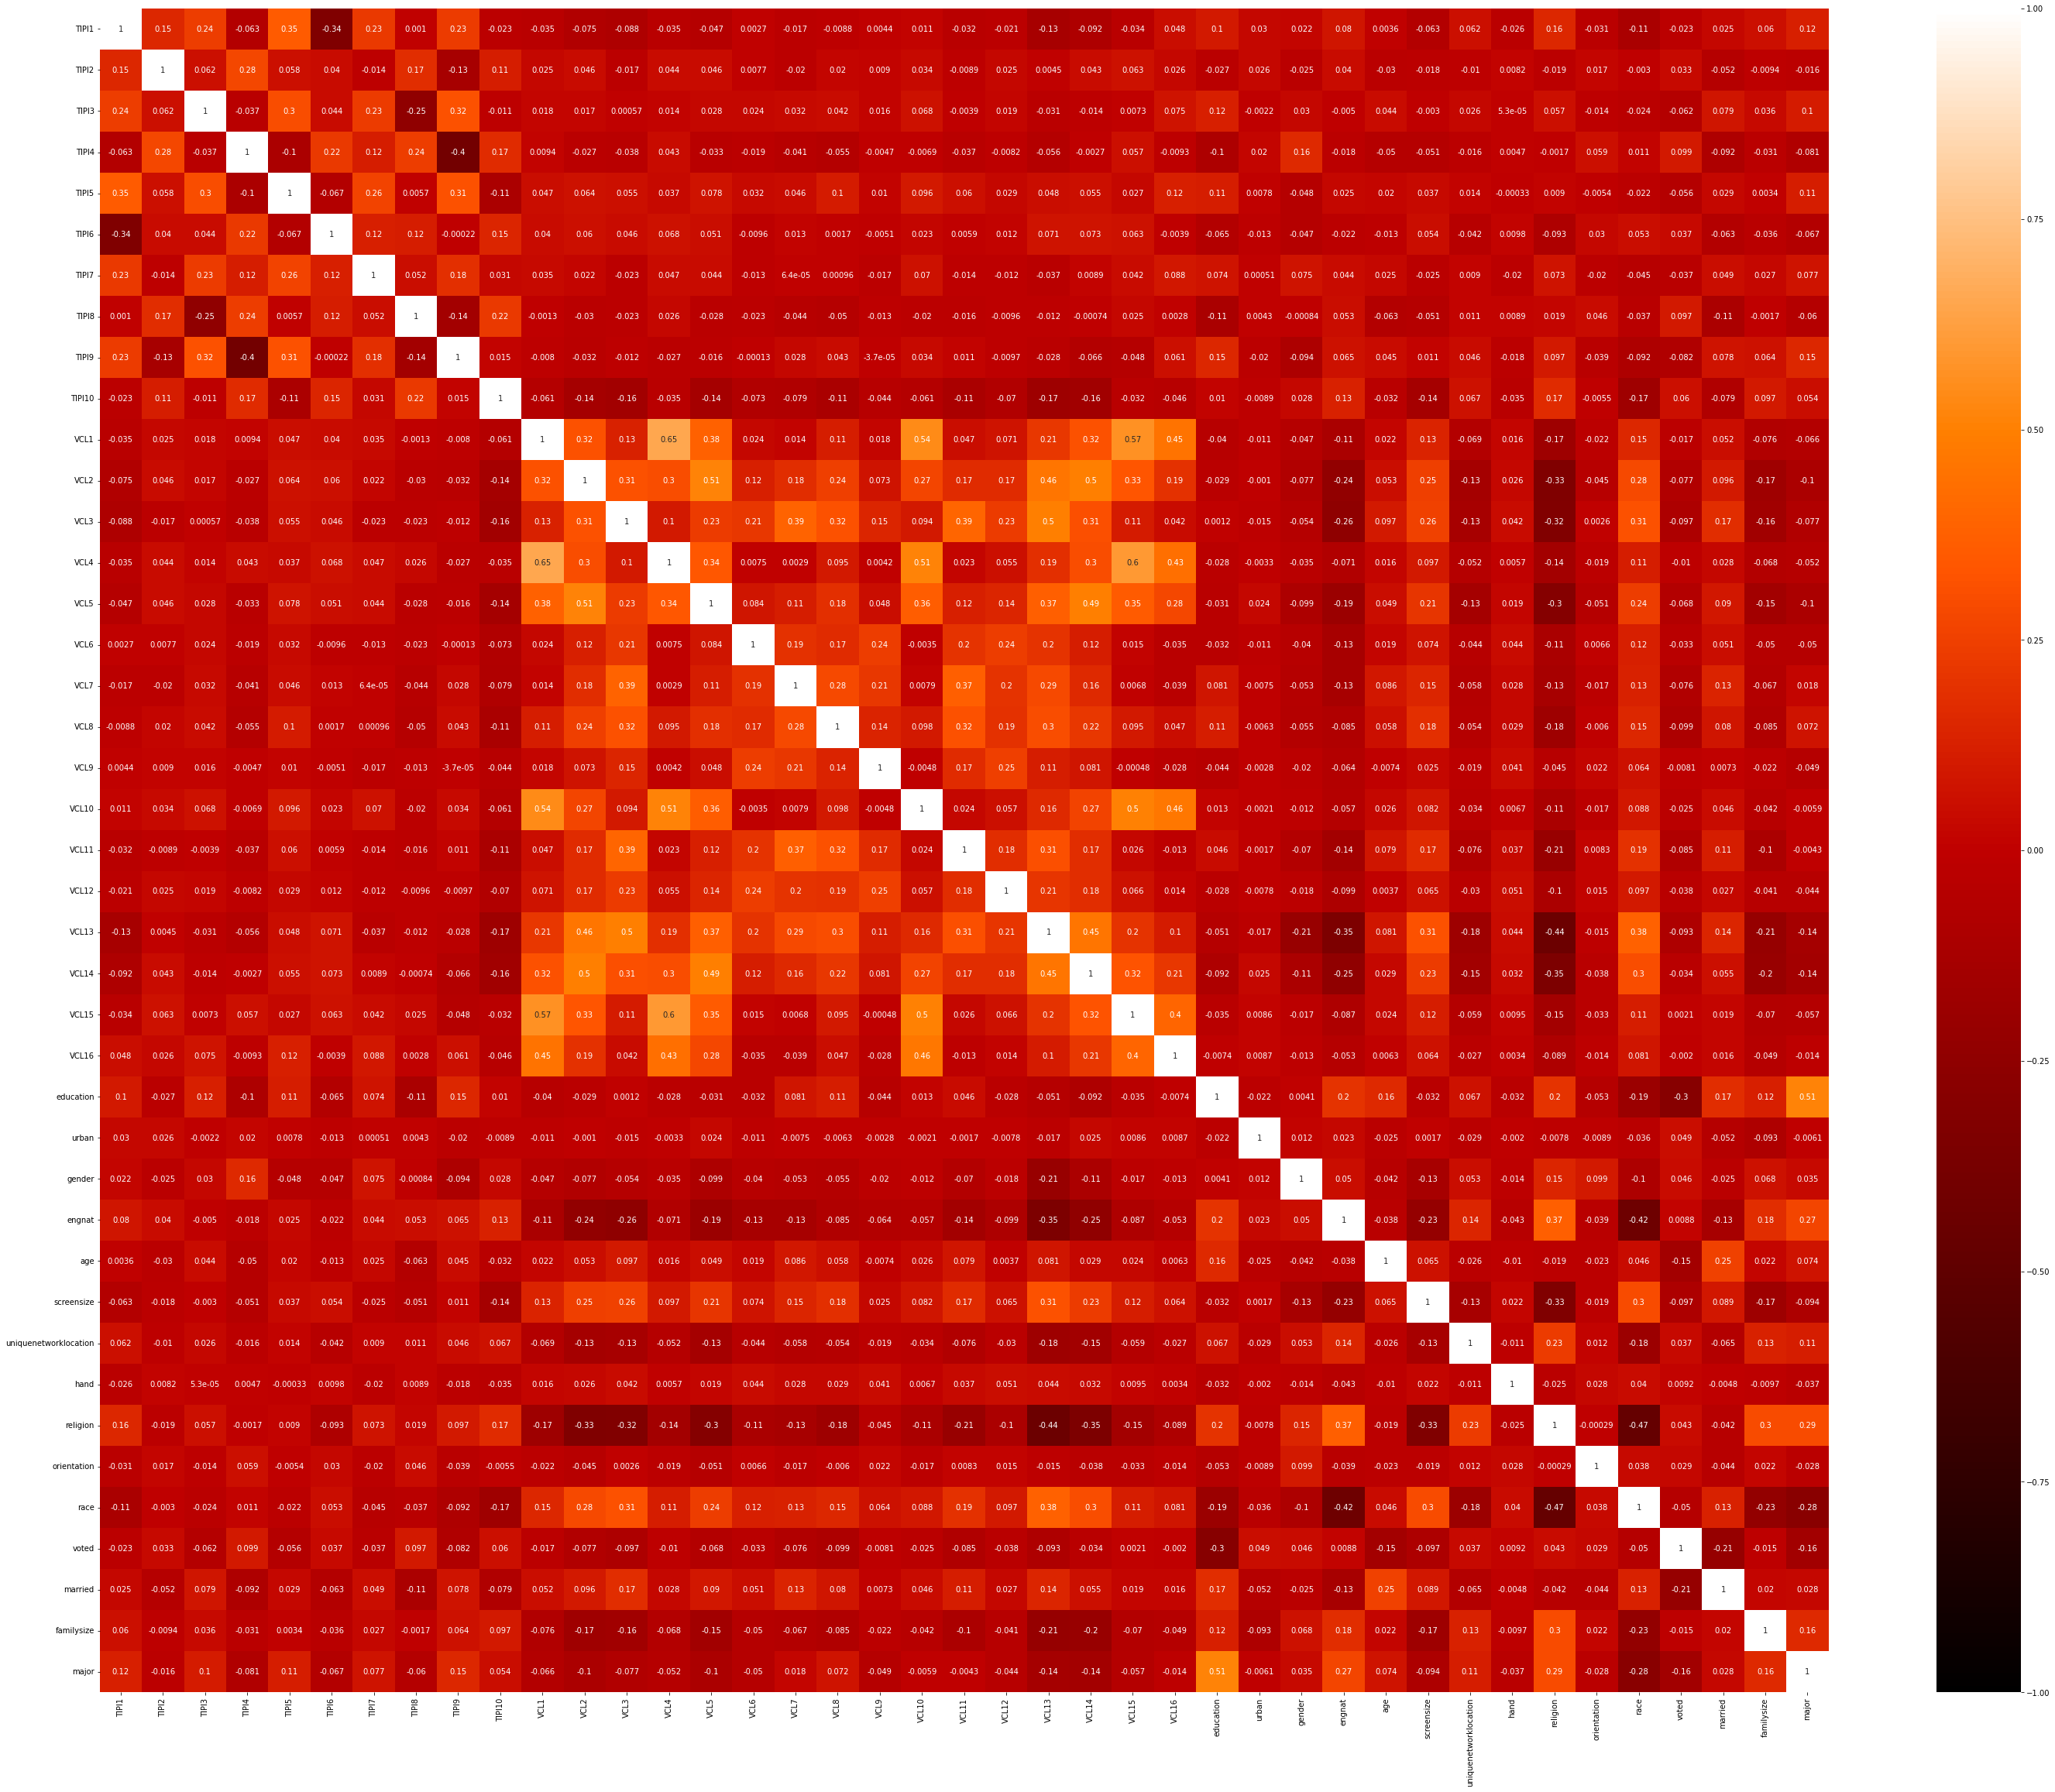

In [36]:
plt.figure(figsize=(50,40))
sns.heatmap(scaled_m_df.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.2g')

# Correlation

<AxesSubplot:>

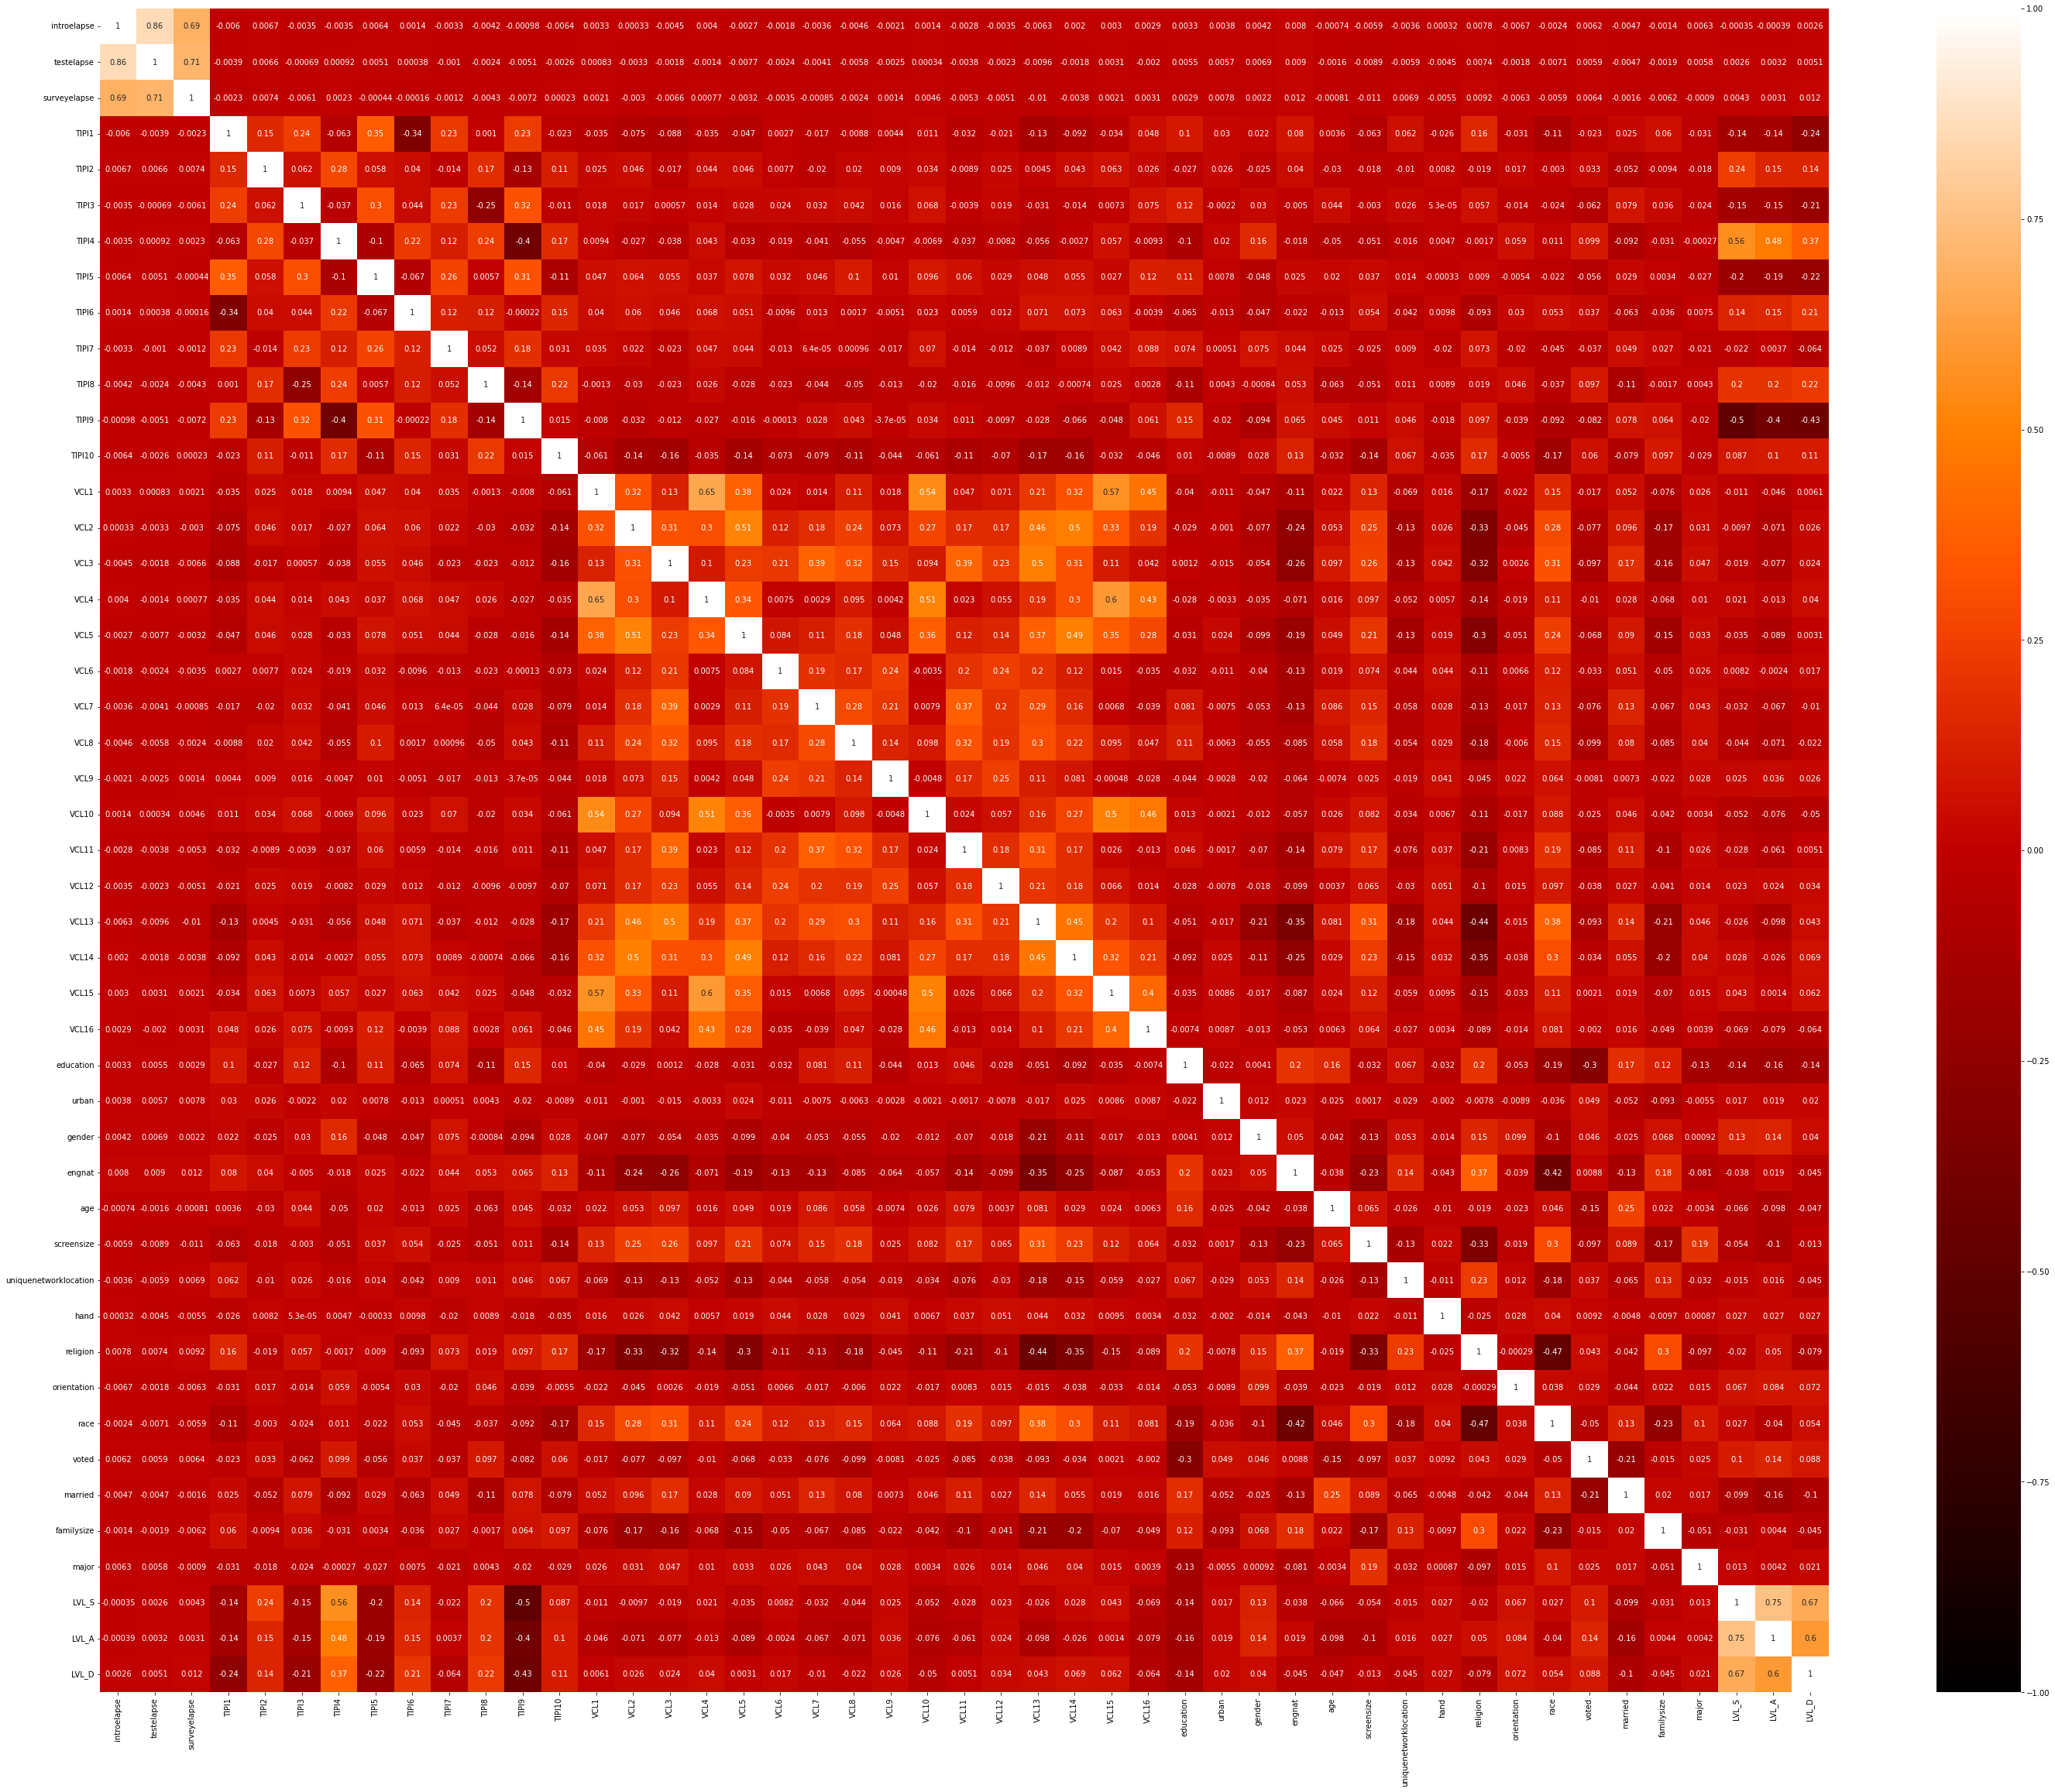

In [37]:
plt.figure(figsize=(50,40))
sns.heatmap(features_df.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.2g')

First three time measurement is not correlated at all, so I can throw it out

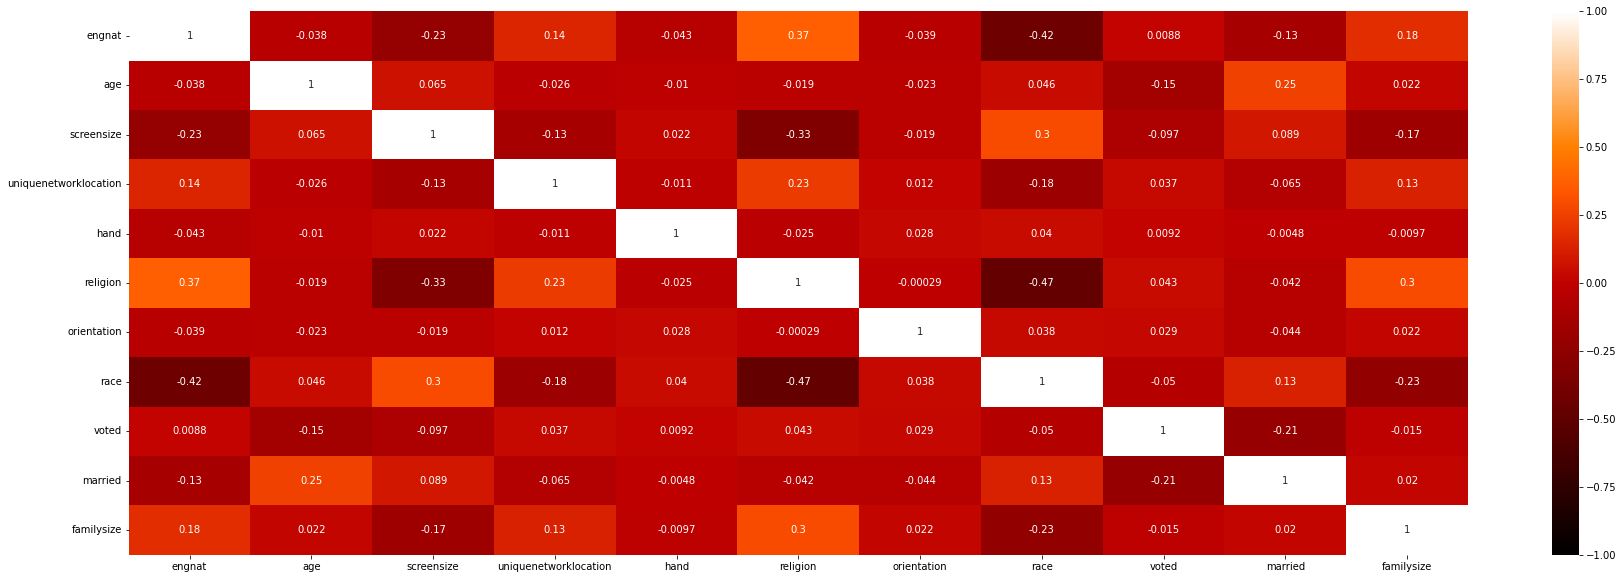

In [292]:
plt.figure(figsize=(30,10))
sns.heatmap(scaled_df[scaled_df.columns[29:]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.2g')
plt.savefig('demo_corr.pdf')

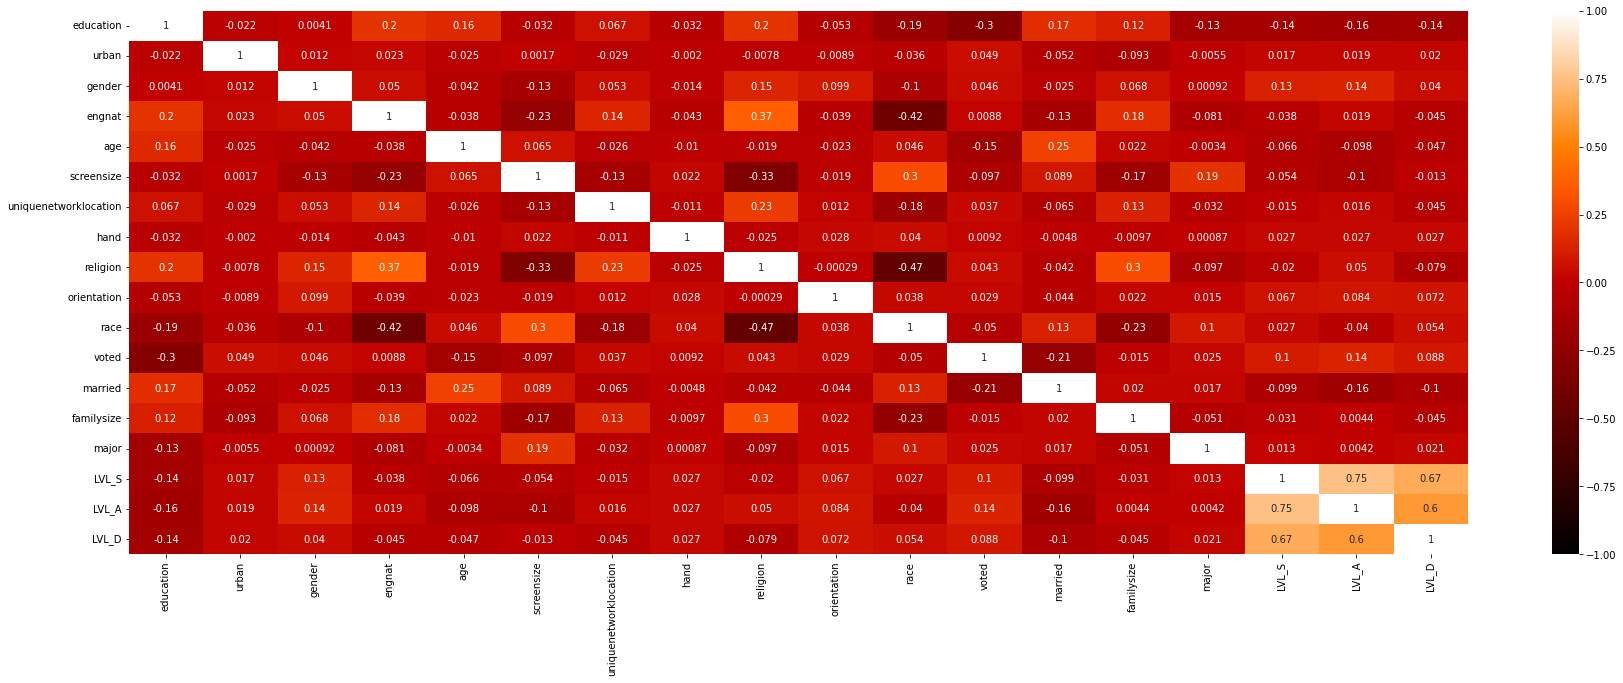

In [291]:
plt.figure(figsize=(30,10))
sns.heatmap(features_df[features_df.columns[29:]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.2g')
plt.savefig('level_corr.pdf')

In [294]:
features_df.head(1)

introelapse  testelapse  surveyelapse  TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  \
0           19         167           166      1      5      7      7      7   

   TIPI6  TIPI7  ...  religion  orientation  race  voted  married  familysize  \
0      7      7  ...        12            1    10      2        1           2   

   major  LVL_S  LVL_A  LVL_D  
0   2954      4      4      3  

[1 rows x 47 columns]

In [39]:
#scaled_df = pd.DataFrame(scaled_df,scaled_df.index, scaled_df.columns[3:])

<AxesSubplot:>

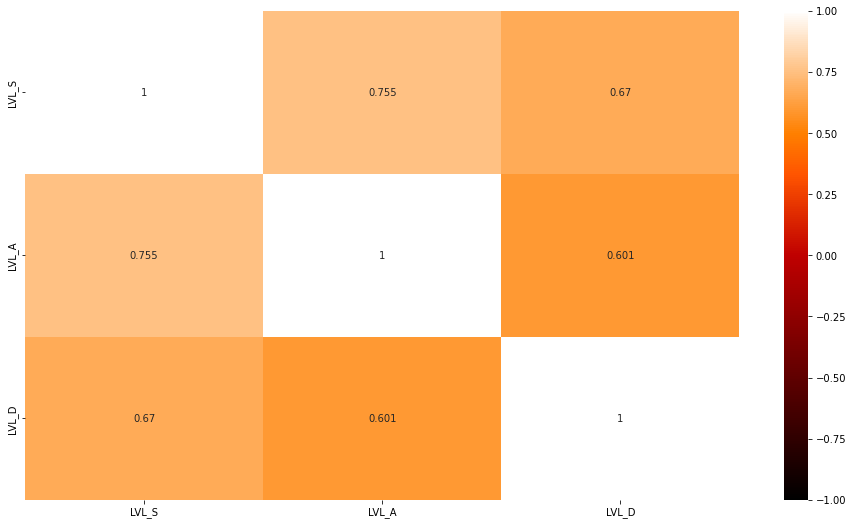

In [40]:
plt.figure(figsize=(16,9))
sns.heatmap(features_df[features_df.columns[-3:]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

<AxesSubplot:>

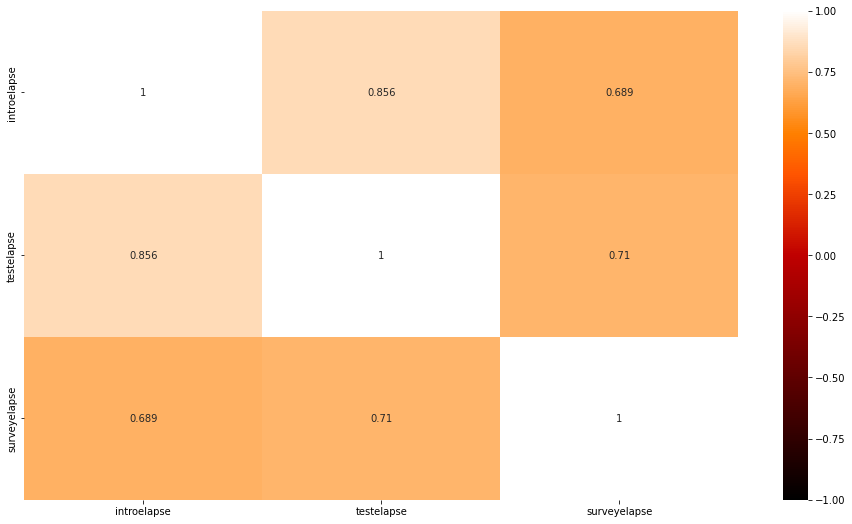

In [41]:
plt.figure(figsize=(16,9))
sns.heatmap(features_df[features_df.columns[:3]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

# t-SNE

In [42]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [43]:
target_df_sum = pd.concat((LVL_Ssum, LVL_Asum, LVL_Dsum),axis=1)

In [44]:
target_df_sum

LVL_Ssum  LVL_Asum  LVL_Dsum
0            40        34        27
1            27        17        24
2            17        12        39
3            16        17        16
4            29        40        32
...         ...       ...       ...
39770        15        12        36
39771        34        34        38
39772         5         1         4
39773        33        13        16
39774        16        10        27

[39775 rows x 3 columns]

In [328]:
stress_max = target_df_sum['LVL_Ssum'][target_df_sum.max(axis=1) == target_df_sum.values[:,0]]
anx_max = target_df_sum['LVL_Asum'][target_df_sum.max(axis=1) == target_df_sum.values[:,1]]
dep_max = target_df_sum['LVL_Dsum'][target_df_sum.max(axis=1) == target_df_sum.values[:,2]]

In [307]:
stress_max = target_df['LVL_S'][target_df.max(axis=1) == target_df.values[:,0]]
anx_max = target_df['LVL_A'][target_df.max(axis=1) == target_df.values[:,1]]
dep_max = target_df['LVL_D'][target_df.max(axis=1) == target_df.values[:,2]]

In [330]:
stress_max.values[:] = 1
anx_max.values[:] = 2
dep_max.values[:] = 3

In [331]:
stress_max, anx_max, dep_max

(0        1
 1        1
 7        1
 10       1
 11       1
         ..
 39761    1
 39768    1
 39769    1
 39772    1
 39773    1
 Name: LVL_Ssum, Length: 19202, dtype: int64, 3        2
 4        2
 8        2
 13       2
 14       2
         ..
 39692    2
 39698    2
 39721    2
 39727    2
 39766    2
 Name: LVL_Asum, Length: 5684, dtype: int64, 2        3
 5        3
 6        3
 9        3
 12       3
         ..
 39765    3
 39767    3
 39770    3
 39771    3
 39774    3
 Name: LVL_Dsum, Length: 18868, dtype: int64)

In [332]:
max_lvls = pd.concat((stress_max, anx_max, dep_max), join='inner', verify_integrity=False)

In [333]:
new_index = max_lvls.index[~max_lvls.index.duplicated(keep='last')].unique()

In [334]:
max_lvls.index[max_lvls.index.duplicated()].unique()

Int64Index([   14,    26,    54,    59,    74,   151,   289,   296,   299,
              316,
            ...
            39545, 39625, 39628, 39638, 39669, 39678, 39691, 39731, 39735,
            39742],
           dtype='int64', length=3544)

In [340]:
np.unique(max_lvls)

array([1, 2, 3])

In [336]:
target_df_sum

LVL_Ssum  LVL_Asum  LVL_Dsum
0            40        34        27
1            27        17        24
2            17        12        39
3            16        17        16
4            29        40        32
...         ...       ...       ...
39770        15        12        36
39771        34        34        38
39772         5         1         4
39773        33        13        16
39774        16        10        27

[39775 rows x 3 columns]

In [337]:
max_lvls = max_lvls.iloc[new_index].sort_index().reset_index(drop=True)

In [338]:
#max_lvls = max_lvls.sort_index()
max_lvls.name = 'Highest Score'

In [54]:
to_pivot_scaled = features_df.join(max_lvls)

In [55]:
#pd.pivot_table(to_pivot_scaled,values='Highest Score', columns='TIPI4', index=to_pivot_scaled.index)

In [324]:
tsne = TSNE(n_components=2)
pca = PCA(n_components=2)

In [57]:
Scaled_TSNE = tsne.fit_transform(scaled_df)

/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


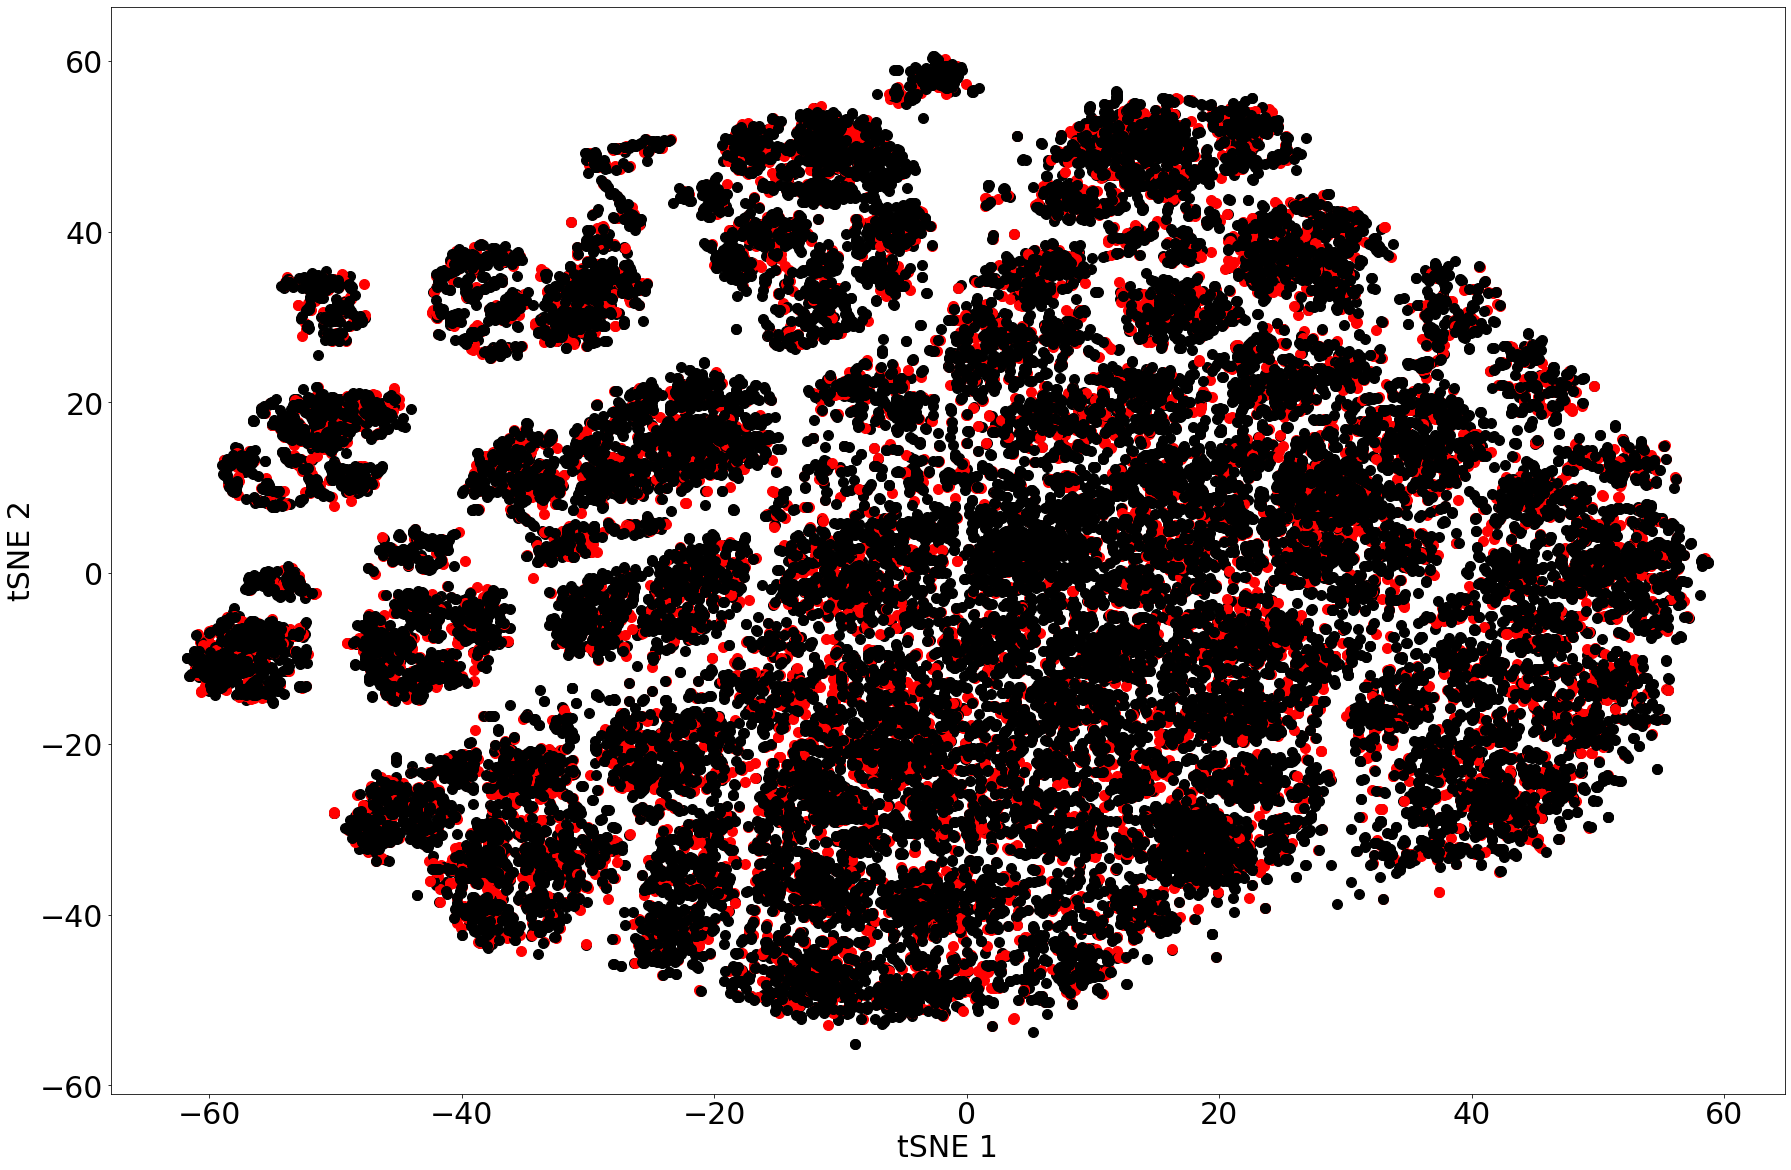

In [304]:
plt.figure(figsize=(30, 20))
for i in range(len(Scaled_TSNE)):
    plt.plot(Scaled_TSNE[i,0],Scaled_TSNE[i,1],'ko' if max_lvls.iloc[i] == 1 else 'ro' if max_lvls.iloc[i] == 2 else 'bo', markersize=10)
plt.xlabel('tSNE 1', fontsize=30)
plt.ylabel('tSNE 2', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('tsne_class.png')

In [341]:
Scaled_PCA = pca.fit_transform(scaled_df)

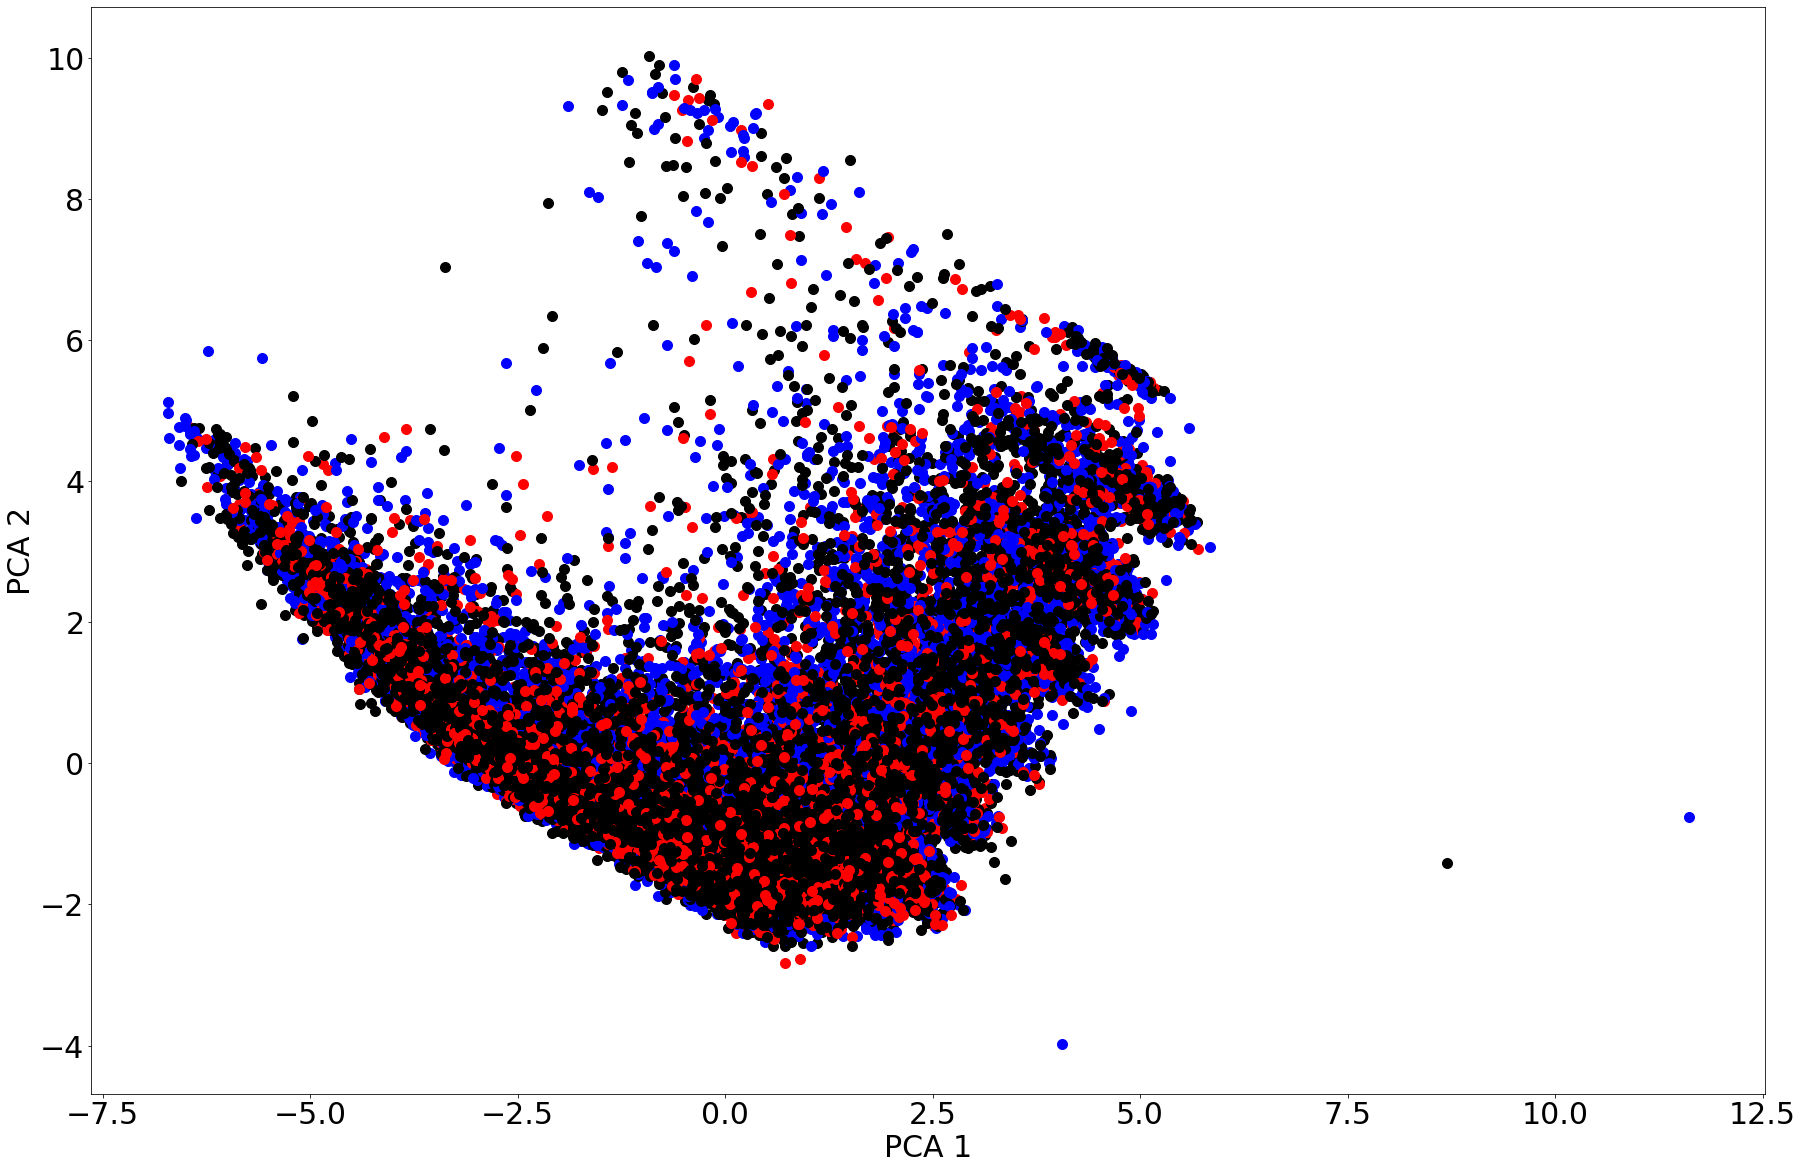

In [342]:
plt.figure(figsize=(30, 20))
for i in range(len(Scaled_PCA)):
    plt.plot(Scaled_PCA[i,0],Scaled_PCA[i,1],'ko' if max_lvls.iloc[i] == 1 else 'ro' if max_lvls.iloc[i] == 2 else 'bo', markersize=10)
plt.xlabel('PCA 1', fontsize=30)
plt.ylabel('PCA 2', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('pca.png')

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
features_df[features_df.columns[-3:]]

LVL_S  LVL_A  LVL_D
0          4      4      3
1          3      3      2
2          2      2      4
3          2      3      1
4          4      4      3
...      ...    ...    ...
39770      2      2      4
39771      4      4      4
39772      0      0      0
39773      4      2      1
39774      2      2      3

[39775 rows x 3 columns]

In [61]:
from sklearn.model_selection import train_test_split #to split up the data into training and testing
feature = features_df.columns[0:44] #select the features
X_train, X_test, y_train, y_test = train_test_split(features_df[feature],
                                                    features_df[features_df.columns[-3:]],
                                                    train_size=0.8,
                                                   random_state=727)

In [352]:
def LinReg(dataf, target, train_s=0.8, rs=None):
    X_train, X_test, y_train, y_test = train_test_split(dataf,
                                                    target,
                                                    train_size=train_s,
                                                   random_state=rs)
    reg_df = LinearRegression().fit(X_train,y_train) 
    y_pred = reg_df.predict(X_test)
    y_pred = np.round(y_pred)
    print(y_pred.shape, y_test.shape)
    print('R2: ', r2_score(y_test, y_pred))
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,
                                  sharex=True,
                                  sharey=True,
                                  figsize=(16,9))
    ax1.scatter(y_test[:,0],y_pred[:,0],marker='*')
    ax1.plot([0,45],[0,45],'r--')
    ax1.set_title('Stress')
#    ax1.set_xlabel('Real', fontsize=15)
    ax1.set_ylabel('Prediction', fontsize=15)
    cm = confusion_matrix(y_test[:,0], y_pred[:,0])
    plt.figure(figsize=(16,9))
    sns.heatmap(cm,
                annot=True,
                fmt="d",
                linewidths=.5,
                square = True)
    plt.title('Accuracy %.2f' % float(sum(np.around(y_pred[:,0])==y_test[:,0])/len(y_test[:,0])))
    plt.ylabel('Original',fontsize=15)
    plt.xlabel('Predicted',fontsize=15)
    
    ax2.scatter(y_test[:,1],y_pred[:,1],marker='o')
    ax2.plot([0,45],[0,45],'r--')
    ax2.set_xlabel('Real', fontsize=15)
    ax2.set_title('Anxiety')
#    ax2.set_ylabel('Prediction', fontsize=15)
    cm = confusion_matrix(y_test[:,1], y_pred[:,1])
    plt.figure(figsize=(16,9))
    sns.heatmap(cm,
                annot=True,
                fmt="d",
                linewidths=.5,
                square = True)
    plt.title('Accuracy %.2f' % float(sum(np.around(y_pred[:,1])==y_test[:,1])/len(y_test[:,1])))
    plt.ylabel('Original',fontsize=15)
    plt.xlabel('Predicted',fontsize=15)
    ax3.scatter(y_test[:,2],y_pred[:,2],marker='x')
    ax3.plot([0,45],[0,45],'r--')
    ax3.set_title('Depression')
#    ax3.set_xlabel('Real', fontsize=15)
#    ax3.set_ylabel('Prediction', fontsize=15)
    fig.suptitle('Predictions, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
    cm = confusion_matrix(y_test[:,2], y_pred[:,2])
    plt.figure(figsize=(16,9))
    sns.heatmap(cm,
                annot=True,
                fmt="d",
                linewidths=.5,
                square = True)
    plt.title('Accuracy %.2f' % float(sum(np.around(y_pred[:,2])==y_test[:,2])/len(y_test[:,2])))
    plt.ylabel('Original',fontsize=15)
    plt.xlabel('Predicted',fontsize=15)
    for i in range(len(dataf.columns)):
        print(dataf.columns[i], reg_df.coef_[:,i])
    return reg_df

(7955, 3) (7955, 3)
R2:  0.37321430627967783
TIPI1 [-0.35957514 -0.27978517 -1.23170881]
TIPI2 [1.03842172 0.25463611 0.60802139]
TIPI3 [-0.10968036 -0.26687418 -0.67322106]
TIPI4 [3.99339296 3.1973442  2.53182469]
TIPI5 [-0.55082518 -0.72048255 -0.56839525]
TIPI6 [0.38147014 0.72959029 1.37027267]
TIPI7 [0.14226309 0.31673863 0.02351151]
TIPI8 [0.39611325 0.59079926 1.11627509]
TIPI9 [-3.11337084 -2.25365135 -3.54817035]
TIPI10 [-0.06697506 -0.0839702   0.5346446 ]
VCL1 [-0.04833156 -0.1285075  -0.08829557]
VCL2 [-0.07557882 -0.17495563 -0.15395135]
VCL3 [-0.00893313 -0.09174491  0.12434159]
VCL4 [0.18020485 0.1543158  0.3003997 ]
VCL5 [-0.24113711 -0.31484681 -0.18722877]
VCL6 [0.20831332 0.22054086 0.16224677]
VCL7 [ 0.07780524 -0.07747925 -0.04243395]
VCL8 [0.05153555 0.13781768 0.03233747]
VCL9 [0.22607086 0.47129932 0.1484135 ]
VCL10 [-0.38028632 -0.38478909 -0.61137569]
VCL11 [-0.11947355 -0.08849683 -0.01592055]
VCL12 [0.20634321 0.43077739 0.19051026]
VCL13 [-0.15435505 -0.382

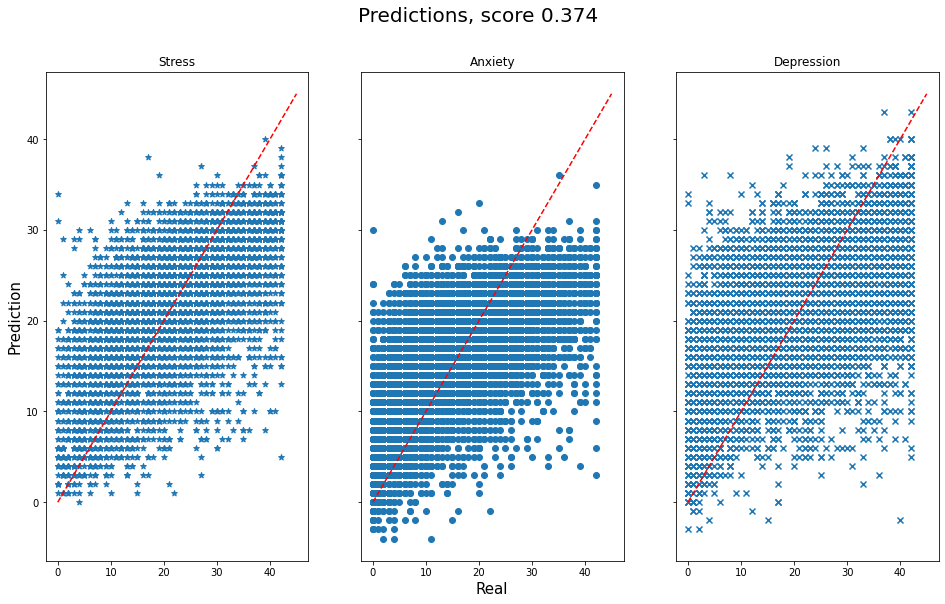

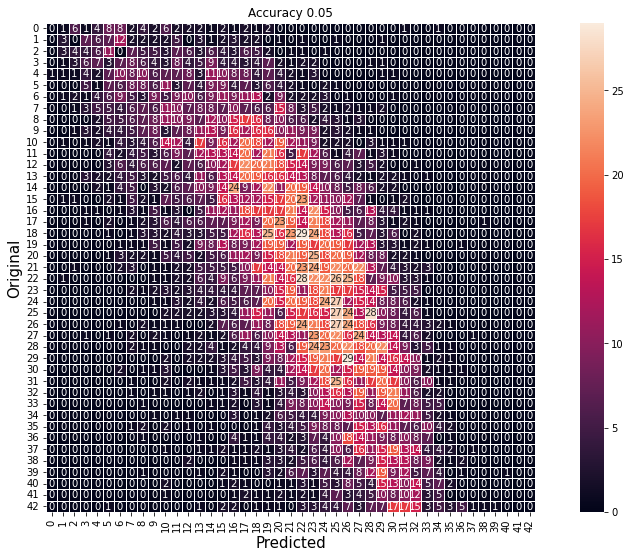

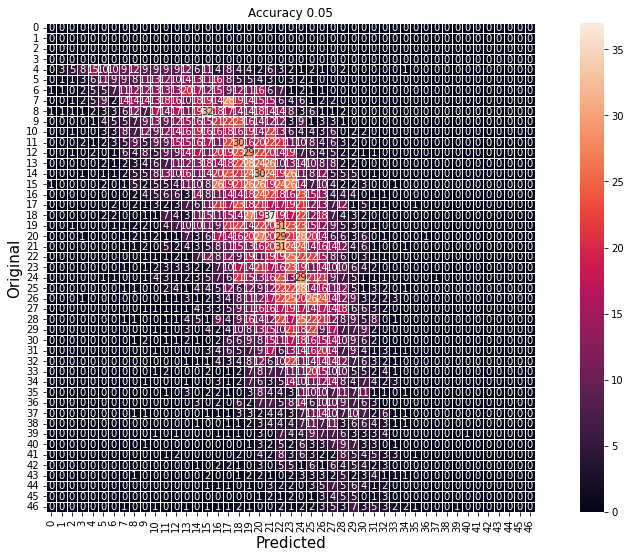

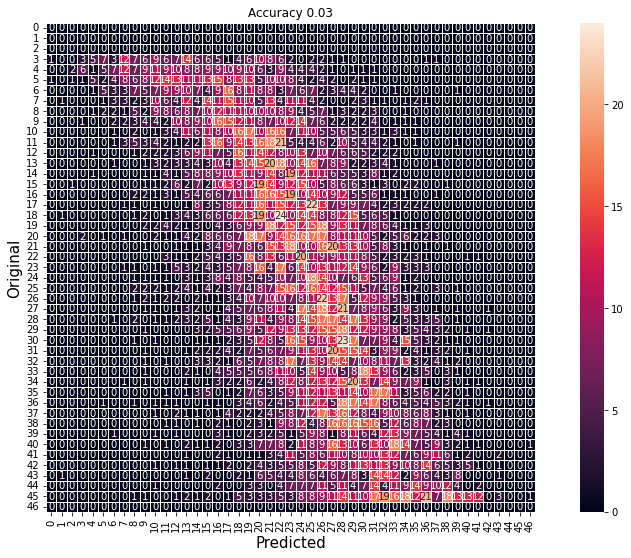

In [353]:
reg_df = LinReg(scaled_df,target_df_sum.values,rs=727)
#reg_df = LinReg(features_df[features_df.columns[:-4]],features_df[features_df.columns[-3:]].values,rs=727)

<AxesSubplot:>

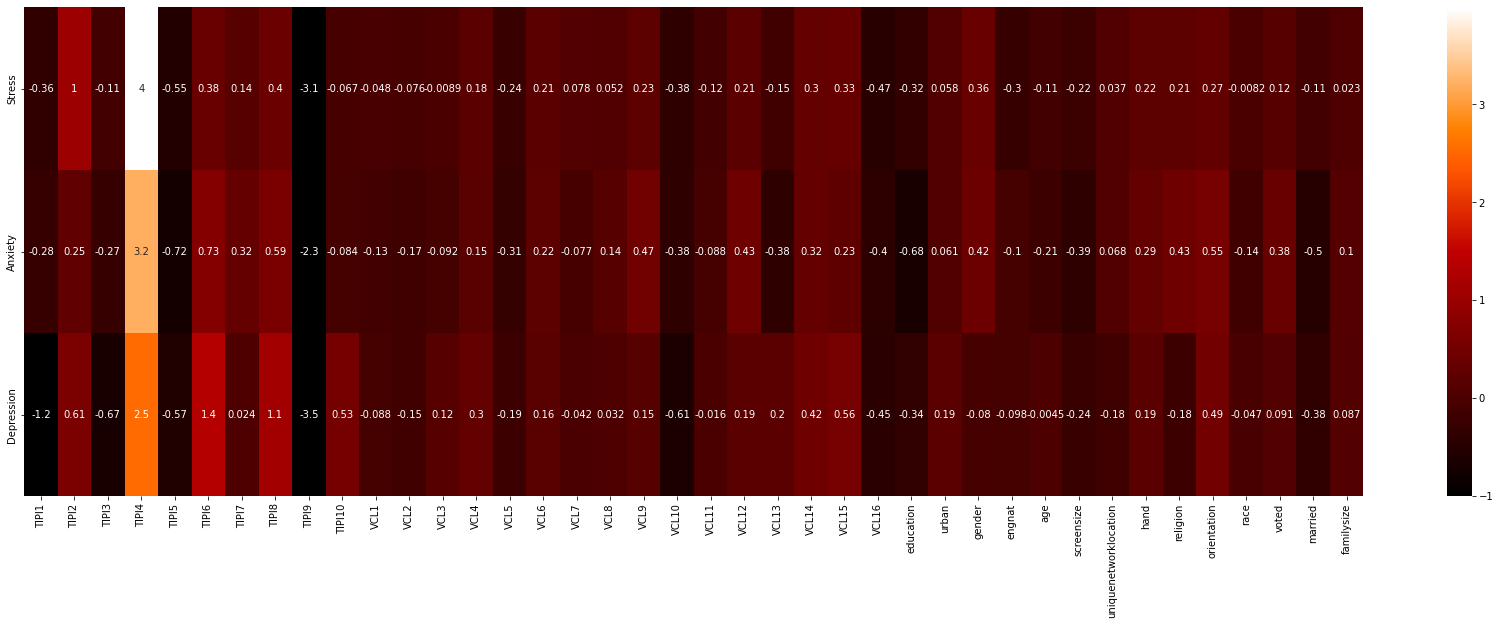

In [79]:
plt.figure(figsize=(30,9))
sns.heatmap(reg_df.coef_,xticklabels=scaled_df.columns, yticklabels=['Stress', 'Anxiety', 'Depression'],             cmap='gist_heat', 
            annot=True,
            vmin=-1.,
           fmt='.2g')

(7955,) (7955,)
R2:  0.43270011363942396


Text(0, 0.5, 'Prediction')

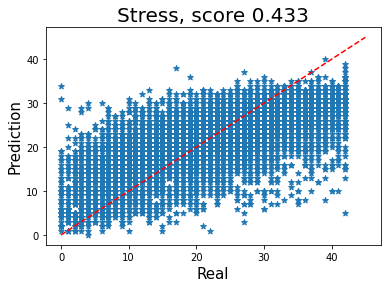

In [86]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df_sum['LVL_Ssum'].values,
                                                train_size=0.8,
                                               random_state=727)
reg_df = LinearRegression().fit(X_train,y_train) 
y_pred = reg_df.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred.shape, y_test.shape)
print('R2: ', r2_score(y_test, y_pred))

plt.scatter(y_test,y_pred,marker='*')
plt.plot([0,45],[0,45],'r--')
plt.title('Stress, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
plt.xlabel('Real', fontsize=15)
plt.ylabel('Prediction', fontsize=15)


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

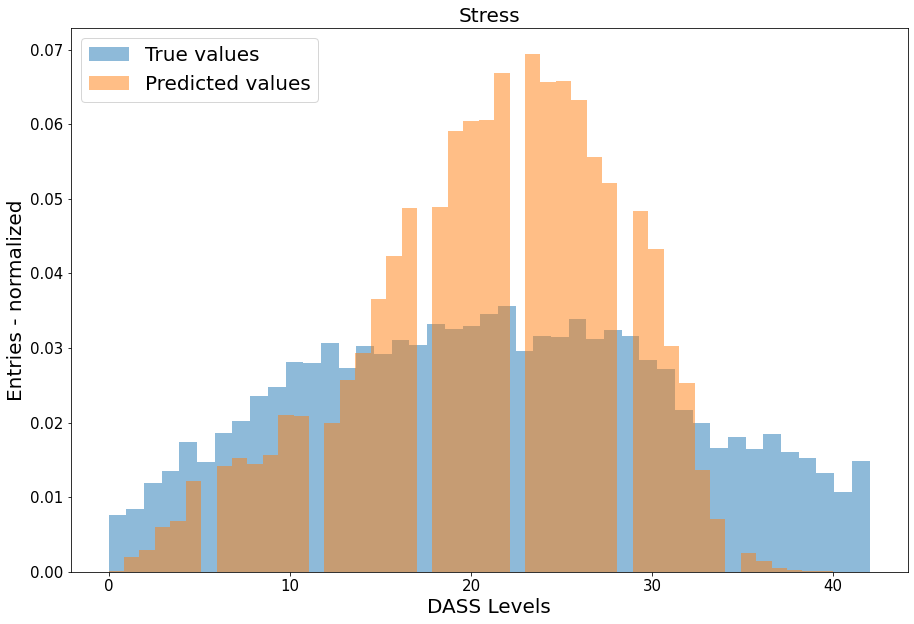

In [83]:
plt.figure(figsize=(15,10))
_ = plt.hist(y_test, density=True, alpha=0.5, label='True values', bins=43)
pred_cnt, pred_bin, _ = plt.hist(y_pred, density=True, alpha=0.5, label='Predicted values', bins=47)
plt.legend(fontsize=20,loc='upper left')
plt.xlabel('DASS Levels', fontsize=20)
plt.ylabel('Entries - normalized', fontsize=20)
plt.title('Stress', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(7955,) (7955,)
R2:  0.342652574252329


Text(0, 0.5, 'Prediction')

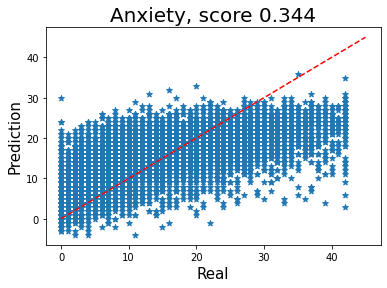

In [87]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df_sum['LVL_Asum'].values,
                                                train_size=0.8,
                                               random_state=727)
reg_df = LinearRegression().fit(X_train,y_train) 
y_pred = reg_df.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred.shape, y_test.shape)
print('R2: ', r2_score(y_test, y_pred))
plt.scatter(y_test,y_pred,marker='*')
plt.plot([0,45],[0,45],'r--')
plt.title('Anxiety, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
plt.xlabel('Real', fontsize=15)
plt.ylabel('Prediction', fontsize=15)

Text(0.5, 1.0, 'Anxiety')

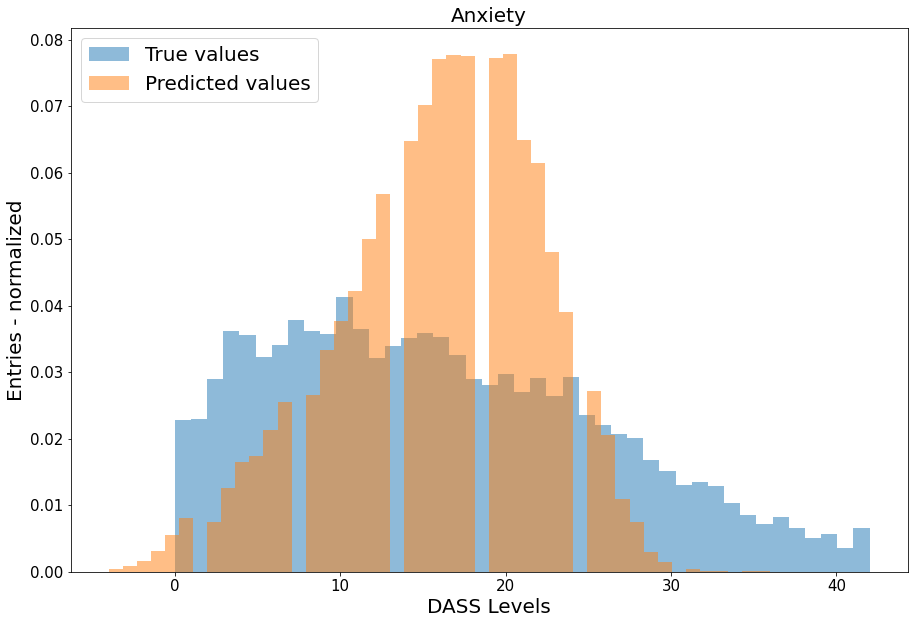

In [88]:
plt.figure(figsize=(15,10))
_ = plt.hist(y_test, density=True, alpha=0.5, label='True values', bins=43)
pred_cnt, pred_bin, _ = plt.hist(y_pred, density=True, alpha=0.5, label='Predicted values', bins=47)
plt.legend(fontsize=20,loc='upper left')
plt.xlabel('DASS Levels', fontsize=20)
plt.ylabel('Entries - normalized', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Anxiety', fontsize=20)

(7955,) (7955,)
R2:  0.34429023094727906


Text(0, 0.5, 'Prediction')

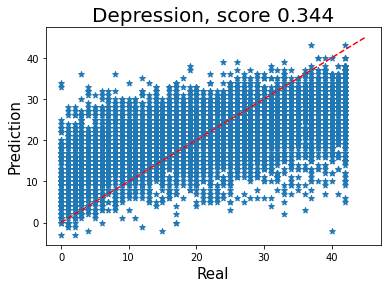

In [90]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df_sum['LVL_Dsum'].values,
                                                train_size=0.8,
                                               random_state=727)
reg_df = LinearRegression().fit(X_train,y_train) 
y_pred = reg_df.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred.shape, y_test.shape)
print('R2: ', r2_score(y_test, y_pred))
plt.scatter(y_test,y_pred,marker='*')
plt.plot([0,45],[0,45],'r--')
plt.title('Depression, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
plt.xlabel('Real', fontsize=15)
plt.ylabel('Prediction', fontsize=15)
#plt.xlim(5,60)
#plt.ylim(5,60)

Text(0.5, 1.0, 'Depression')

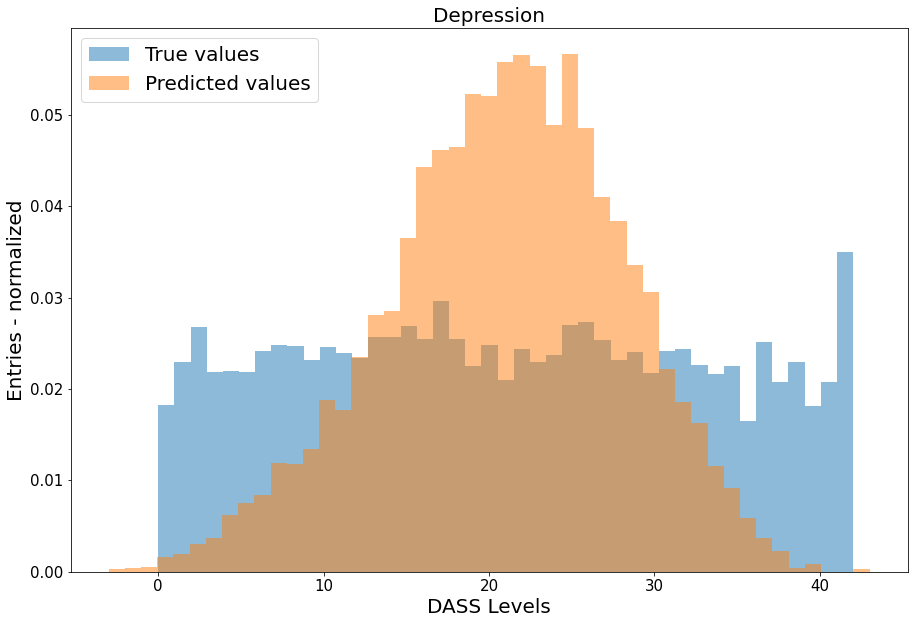

In [91]:
plt.figure(figsize=(15,10))
_ = plt.hist(y_test, density=True, alpha=0.5, label='True values', bins=43)
pred_cnt, pred_bin, _ = plt.hist(y_pred, density=True, alpha=0.5, label='Predicted values', bins=47)
plt.legend(fontsize=20,loc='upper left')
plt.xlabel('DASS Levels', fontsize=20)
plt.ylabel('Entries - normalized', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Depression', fontsize=20)

## Let's see without any questions, purely based on demographics

(7955, 3) (7955, 3)
R2:  0.05574812180890768
education [-1.03792099 -1.33318365 -1.21879388]
urban [0.15863436 0.11740193 0.22130004]
gender [1.27134683 1.17588652 0.5526329 ]
engnat [-0.3408905  -0.09551791 -0.1139069 ]
age [-0.1573356  -0.26262874 -0.03460526]
screensize [-0.53836266 -0.68976014 -0.47401381]
uniquenetworklocation [-0.16375064 -0.08061534 -0.43959246]
hand [0.3012156  0.3701498  0.29956061]
religion [-0.07186068  0.31074944 -0.76238678]
orientation [0.49506286 0.75878175 0.72693488]
race [0.27058439 0.02255384 0.28695712]
voted [0.55661968 0.73639283 0.54340249]
married [-0.66635325 -0.99733603 -1.00782258]
familysize [-0.14062201 -0.00525494 -0.08886994]


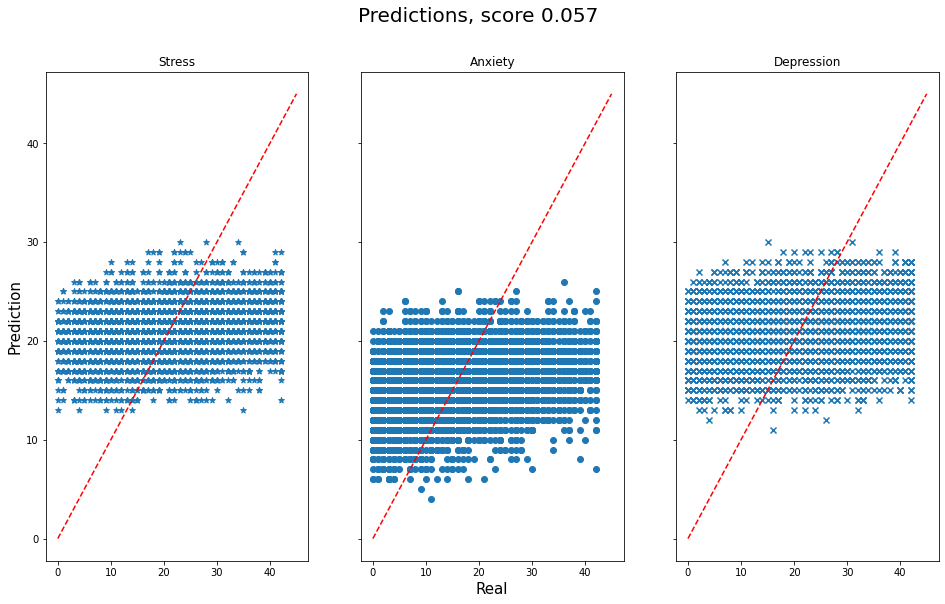

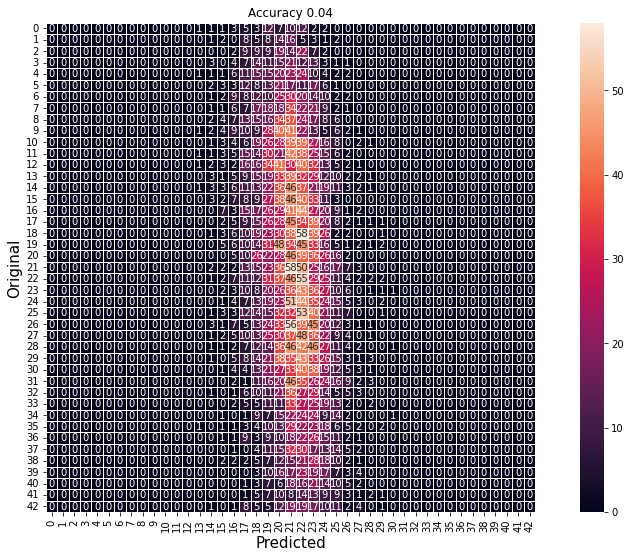

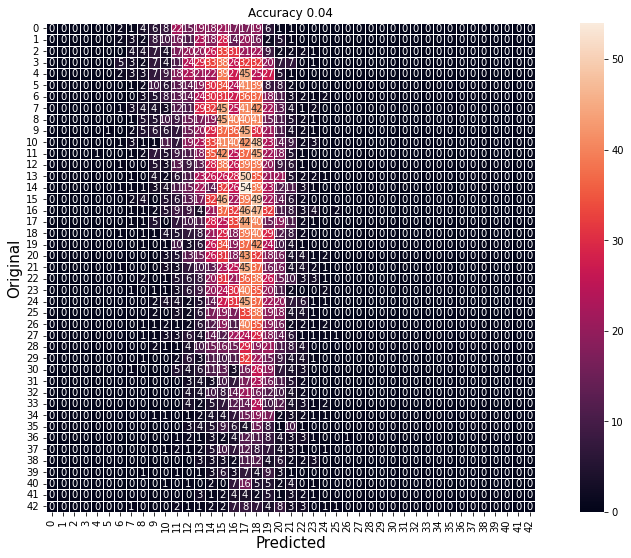

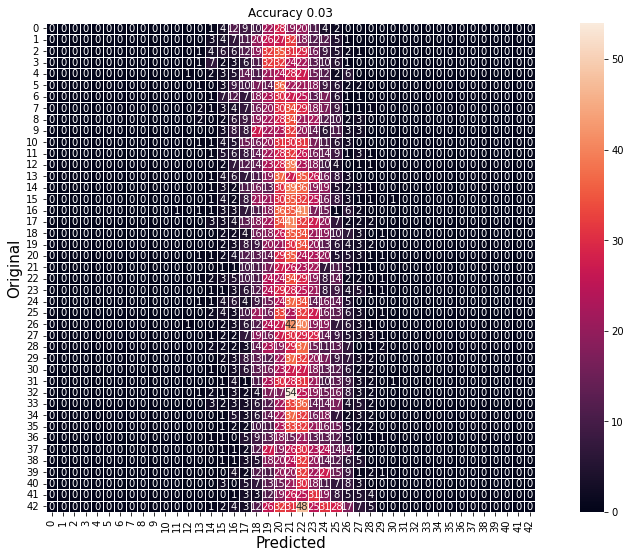

In [354]:
reg_df41 = LinReg(scaled_df[scaled_df.columns[-14:]],target_df_sum.values,rs=727)

<AxesSubplot:>

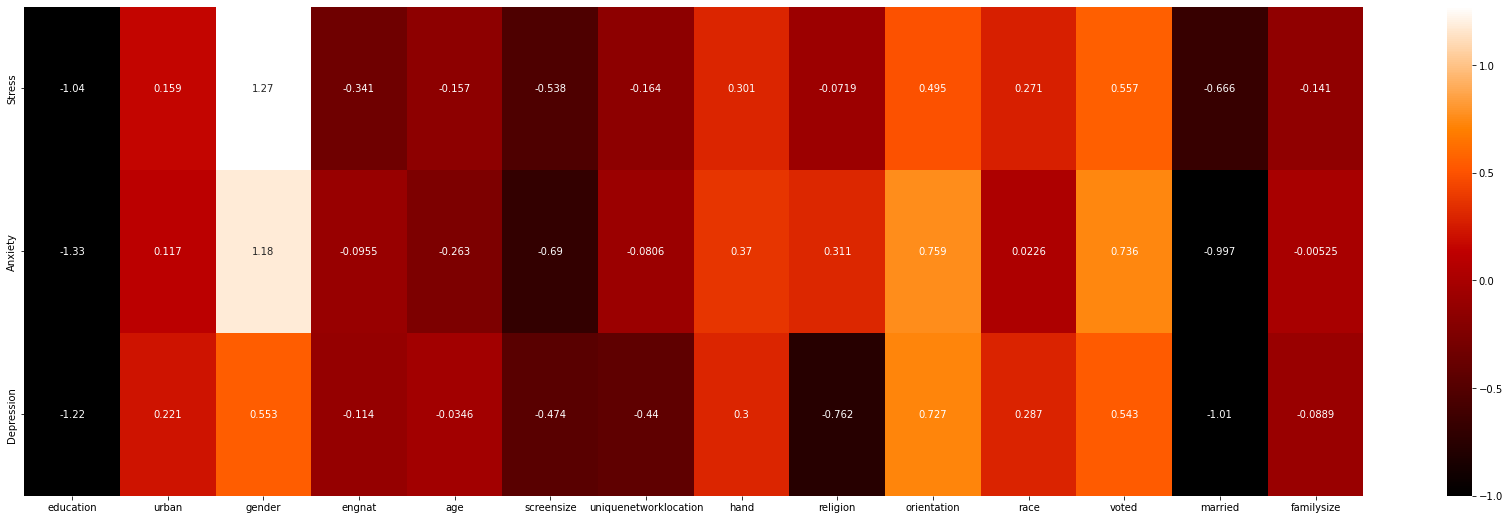

In [102]:
plt.figure(figsize=(30,9))
sns.heatmap(reg_df41.coef_,xticklabels=scaled_df.columns[-14:], yticklabels=['Stress', 'Anxiety', 'Depression'],             cmap='gist_heat', 
            annot=True,
            vmin=-1.,
           fmt='.3g')

## Only questions

(7955, 3) (7955, 3)
R2:  0.36416859000647794
TIPI1 [-0.36889462 -0.2911238  -1.26228082]
TIPI2 [1.00605802 0.24046691 0.63036634]
TIPI3 [-0.09230011 -0.28659023 -0.7031481 ]
TIPI4 [4.1063596  3.36225582 2.58713199]
TIPI5 [-0.58500659 -0.74617096 -0.5633552 ]
TIPI6 [0.35951056 0.73401728 1.42759505]
TIPI7 [ 0.13751374  0.28072594 -0.04142051]
TIPI8 [0.45031132 0.74653979 1.19489691]
TIPI9 [-3.17386713 -2.34582654 -3.60875045]
TIPI10 [-0.08025644 -0.06187861  0.50574048]
VCL1 [-0.0498249  -0.15238793 -0.08369829]
VCL2 [-0.09539601 -0.27387673 -0.18314391]
VCL3 [-0.01999468 -0.23033176  0.08223063]
VCL4 [0.16597315 0.1479742  0.29891106]
VCL5 [-0.29548906 -0.44873315 -0.19944458]
VCL6 [0.23427441 0.24700804 0.18847909]
VCL7 [ 0.03186256 -0.18671281 -0.12047401]
VCL8 [-0.02063167  0.01685076 -0.02919186]
VCL9 [0.27836971 0.58614568 0.20028125]
VCL10 [-0.38183255 -0.38448575 -0.63865659]
VCL11 [-0.15441247 -0.18268001 -0.02659386]
VCL12 [0.24827735 0.5141122  0.22165535]
VCL13 [-0.25395023 

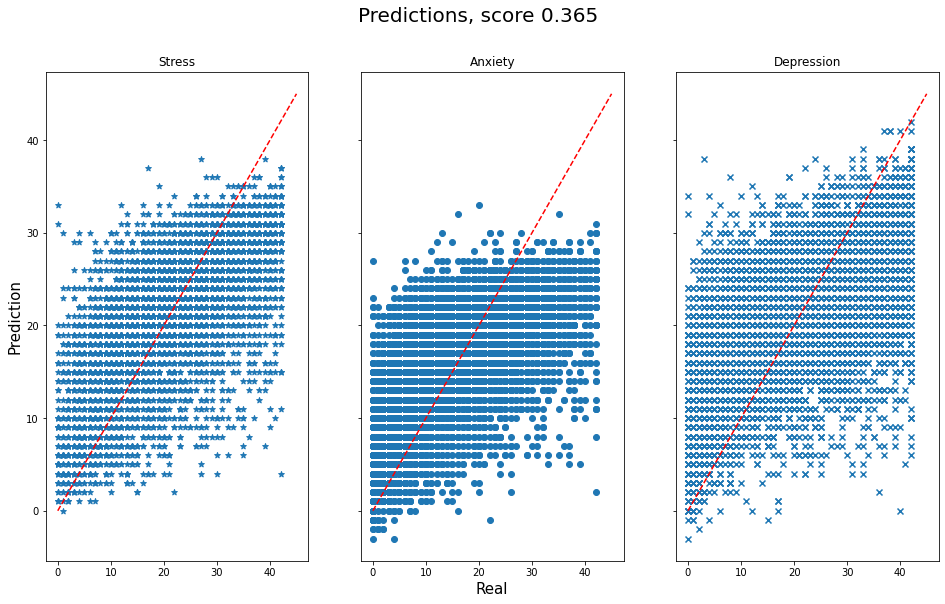

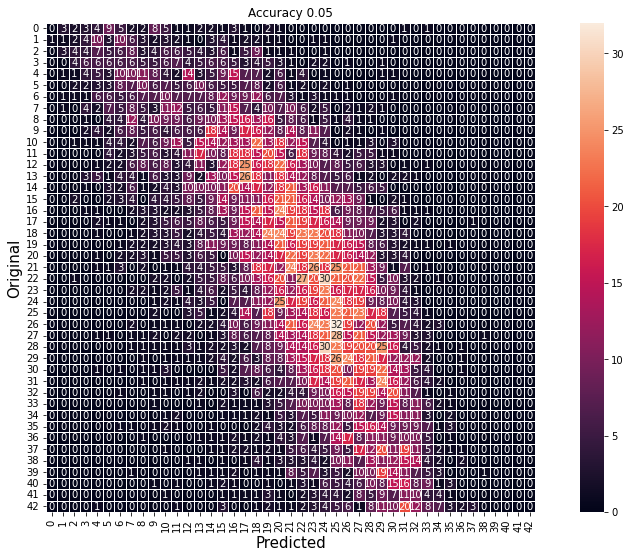

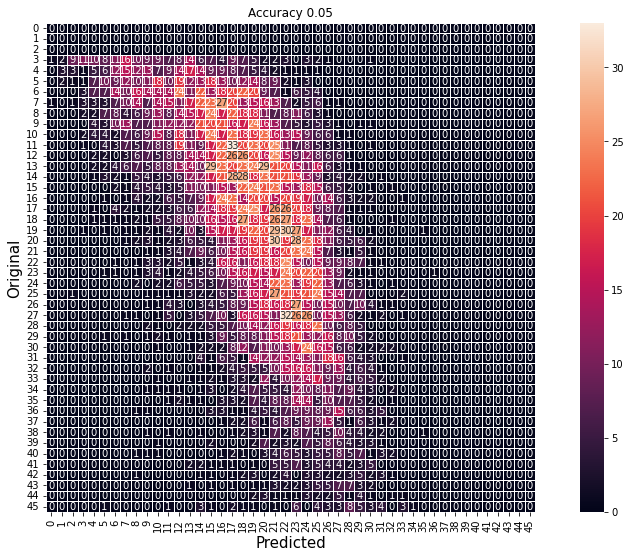

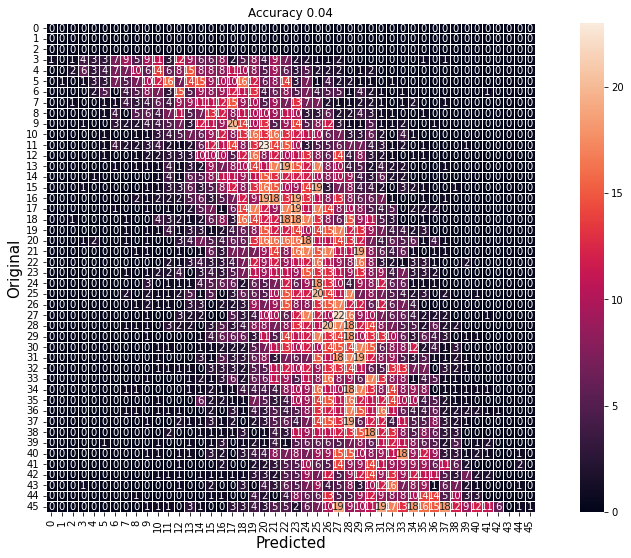

In [355]:
reg_df42 = LinReg(scaled_df[scaled_df.columns[:-14]],target_df_sum.values,rs=727)

<AxesSubplot:>

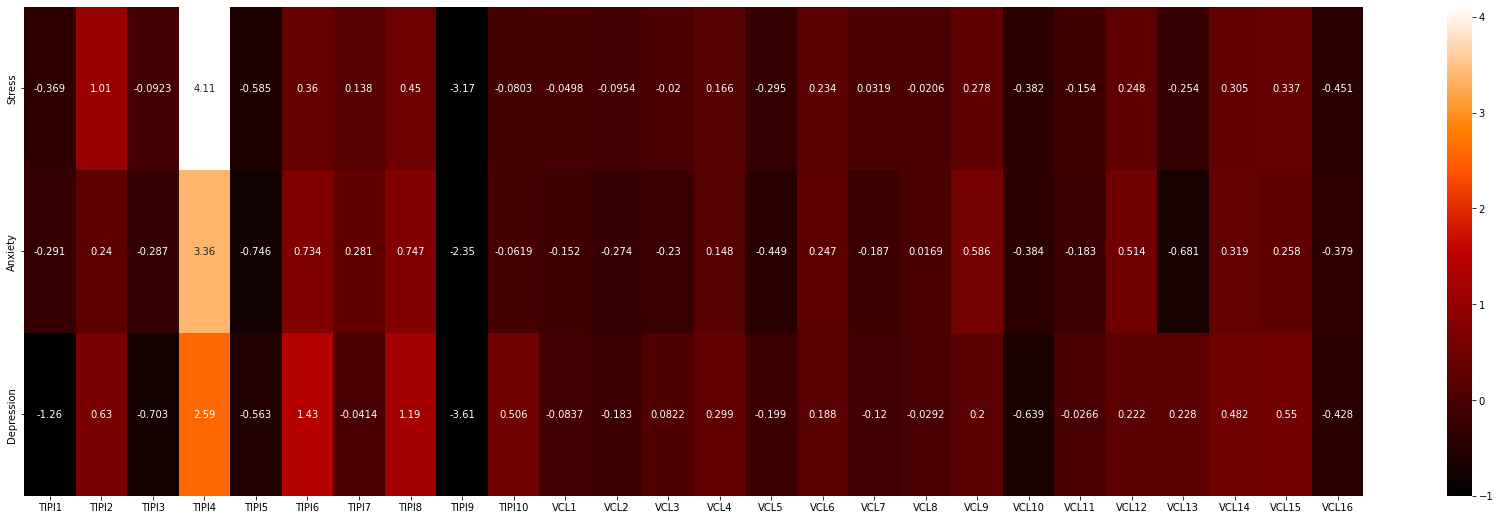

In [105]:
plt.figure(figsize=(30,9))
sns.heatmap(reg_df42.coef_,xticklabels=scaled_df.columns[:-14], yticklabels=['Stress', 'Anxiety', 'Depression'],             cmap='gist_heat', 
            annot=True,
            vmin=-1.,
           fmt='.3g')

## Largest values

(7955,) (7955,)
R2:  0.002609071177254063


Text(0, 0.5, 'Prediction')

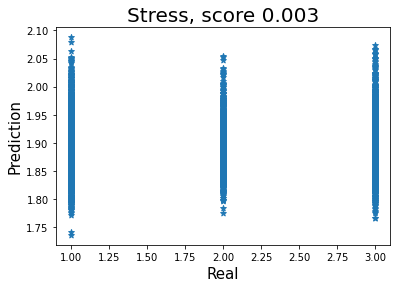

In [106]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                max_lvls,
                                                train_size=0.8,
                                               random_state=727)
reg_df = LinearRegression().fit(X_train,y_train) 
y_pred = reg_df.predict(X_test)
#y_pred = np.round(y_pred)
print(y_pred.shape, y_test.shape)
print('R2: ', r2_score(y_test, y_pred))
plt.scatter(y_test,y_pred,marker='*')
#plt.plot([0,60],[0,60],'r--')
plt.title('Stress, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
plt.xlabel('Real', fontsize=15)
plt.ylabel('Prediction', fontsize=15)


## Major added

(7955, 3) (7955, 3)
R2:  0.3737018545813741
TIPI1 [-0.35761578 -0.27716097 -1.22717921]
TIPI2 [1.03853792 0.25479174 0.60829002]
TIPI3 [-0.10743572 -0.2638679  -0.66803198]
TIPI4 [3.9915895  3.19492881 2.52765552]
TIPI5 [-0.54498246 -0.71265734 -0.55488826]
TIPI6 [0.37981038 0.72736735 1.36643569]
TIPI7 [0.14457979 0.31984142 0.02886719]
TIPI8 [0.39398455 0.58794828 1.11135405]
TIPI9 [-3.1082796 -2.2468326 -3.5364006]
TIPI10 [-0.06427745 -0.08035726  0.54088085]
VCL1 [-0.05004705 -0.13080507 -0.09226137]
VCL2 [-0.07466688 -0.17373426 -0.15184316]
VCL3 [-0.00755599 -0.0899005   0.12752522]
VCL4 [0.17958743 0.15348887 0.29897236]
VCL5 [-0.24469266 -0.3196088  -0.19544836]
VCL6 [0.20733141 0.21922578 0.15997682]
VCL7 [ 0.07875008 -0.07621382 -0.04024971]
VCL8 [0.06350423 0.15384747 0.06000626]
VCL9 [0.22259764 0.4666476  0.14038423]
VCL10 [-0.37784921 -0.38152504 -0.60574166]
VCL11 [-0.11665188 -0.08471773 -0.0093975 ]
VCL12 [0.20496273 0.42892849 0.1873189 ]
VCL13 [-0.15430936 -0.3819761

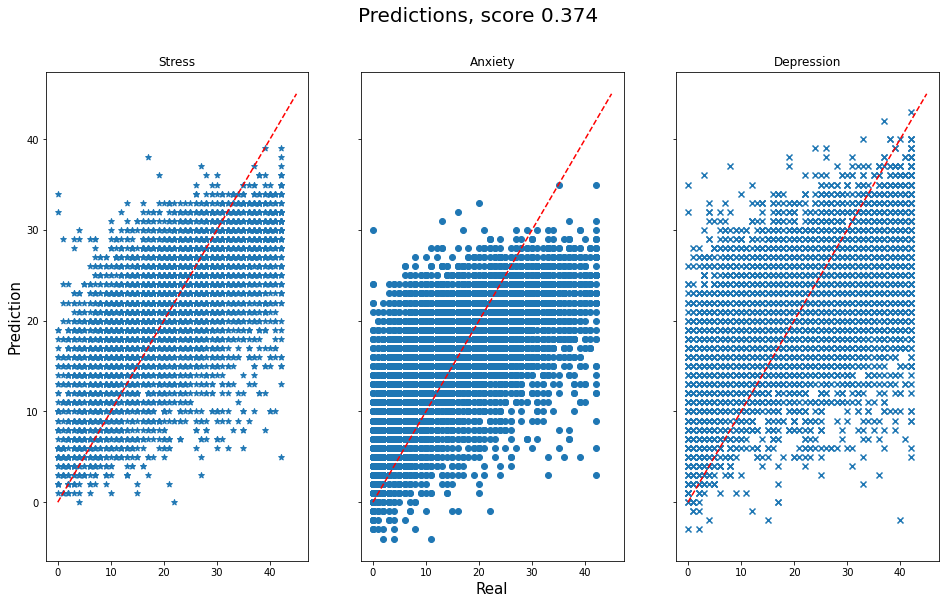

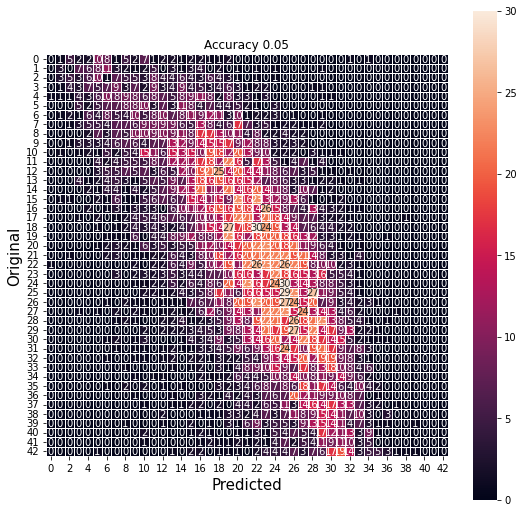

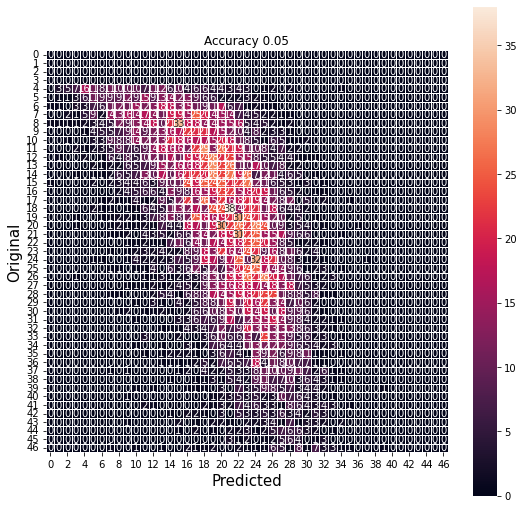

<Figure size 2160x648 with 0 Axes>

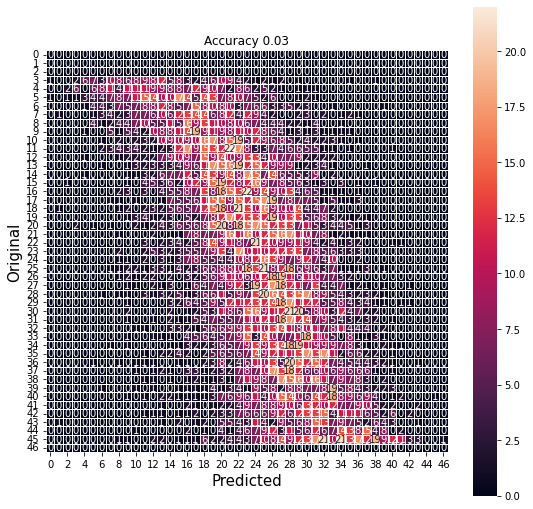

In [107]:
reg_df44 = LinReg(scaled_m_df,target_df_sum.values,rs=727)

<AxesSubplot:>

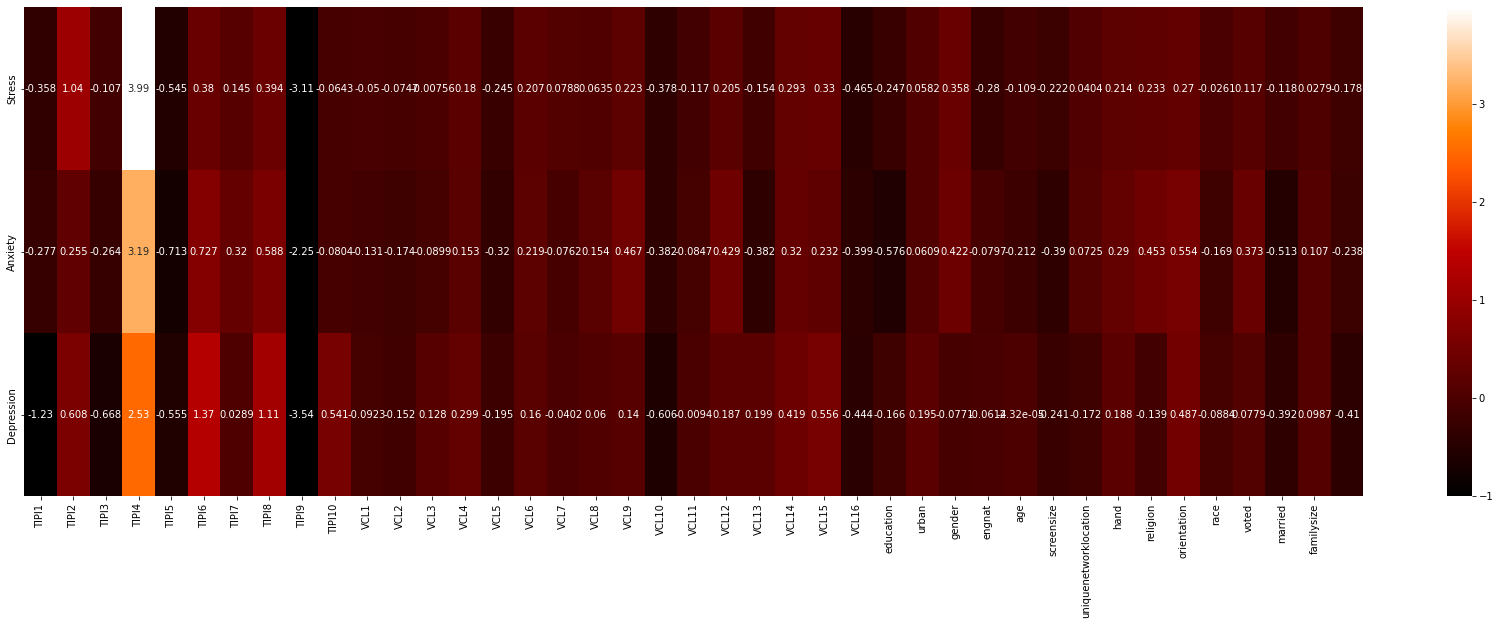

In [345]:
plt.figure(figsize=(30,9))
sns.heatmap(reg_df44.coef_,xticklabels=scaled_df.columns, yticklabels=['Stress', 'Anxiety', 'Depression'],             cmap='gist_heat', 
            annot=True,
            vmin=-1.,
           fmt='.3g')

# Elastic, Ridge and CV

In [161]:
from sklearn.linear_model import (Ridge,
                                  Lasso, ElasticNet,
                                  LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import (RandomizedSearchCV,
                                     GridSearchCV,
                                     cross_validate, cross_val_score,
                                     cross_val_predict)

In [168]:
linreg = LinearRegression()
results = cross_validate(linreg, scaled_df, target_df_sum, cv=5,
                         return_train_score=True)

In [169]:
test_mean, test_std = np.mean(results['test_score']),\
                      np.std(results['test_score'])
train_mean, train_std = np.mean(results['train_score']),\
                      np.std(results['train_score'])

print('Cross-validation R^2 [training] : %.3f \pm %.3f' % (train_mean,
                                                           train_std))
print('Cross-validation R^2 [testing]  : %.3f \pm %.3f' % (test_mean,
                                                           test_std))

Cross-validation R^2 [training] : 0.382 \pm 0.002
Cross-validation R^2 [testing]  : 0.376 \pm 0.010


## Lasso

In [171]:
lasso = Lasso()

dist = dict(alpha=np.linspace(1e-6, .05, 50),
            normalize=[True, False], 
            max_iter=[5_000, 20_000])

clf = GridSearchCV(lasso, dist, cv=5, verbose=1,
                   return_train_score=True, n_jobs=8)

In [235]:
search = clf.fit(features_df, target_df_sum)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [236]:
search.best_params_

{'alpha': 0.0030621632653061222, 'max_iter': 5000, 'normalize': False}

In [186]:
%%time
coeffs = []
alphas = np.linspace(1e-6, .05, 200)

for alpha in alphas:
    lasso = Lasso(alpha=alpha,
                  max_iter=10_000,
                  normalize=True)
    lasso.fit(scaled_df, target_df_sum)
    coeffs.append(lasso.coef_)

CPU times: user 19.5 s, sys: 2.38 s, total: 21.9 s
Wall time: 11.5 s


In [187]:
def plot_shrinkage(alphas, coeffs, limit=2):
    coeffs = np.array(coeffs)

    plt.figure(figsize=(16, 12))
    plt.plot(alphas, coeffs)
    
    non_null = np.where(coeffs[limit])

    if len(non_null[0]) < 10:
        for _y, ind in zip(np.linspace(-.5, .5, len(non_null[0])), non_null[0]):
            plt.text(alphas[limit], _y, s=df.columns[ind], fontsize=12)

        plt.vlines(alphas[limit], ymin=-1, ymax=1, label='alpha = %.5f' % alphas[limit])
        plt.legend()

    plt.xscale('log')   
    plt.xlabel('Penalty')
    plt.ylabel('Coeff')
    plt.show()

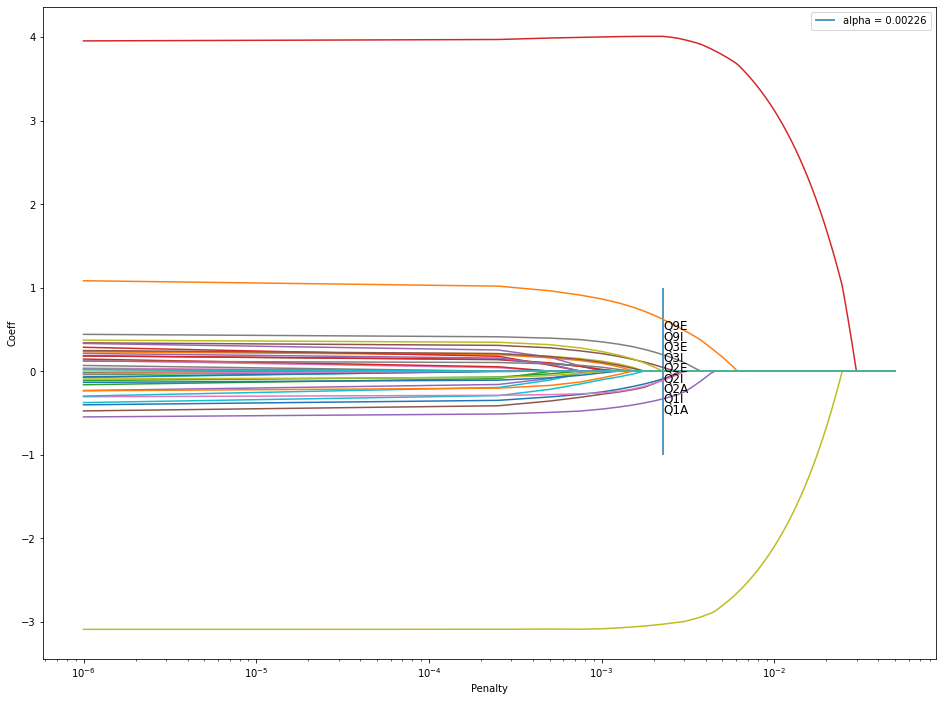

In [201]:
plot_shrinkage(alphas, np.array(coeffs)[:,0,:], limit=9)

## Ridge

In [211]:
%%time
coeffs = []
alphas = np.linspace(1e-6, 2000., 500)

for alpha in alphas:
    lasso = Ridge(alpha=alpha,
                  max_iter=10_000,
                  normalize=True)
    lasso.fit(scaled_df, target_df_sum)
    coeffs.append(lasso.coef_)

CPU times: user 31.6 s, sys: 7.86 s, total: 39.5 s
Wall time: 21.4 s


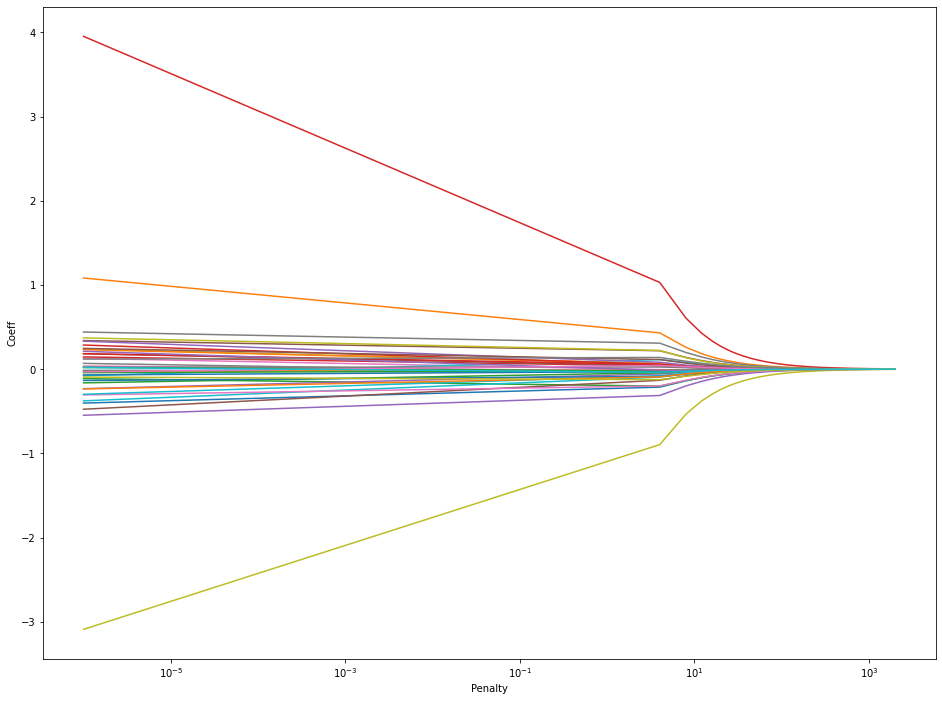

In [212]:
plot_shrinkage(alphas, np.array(coeffs)[:,0,:], limit=10)

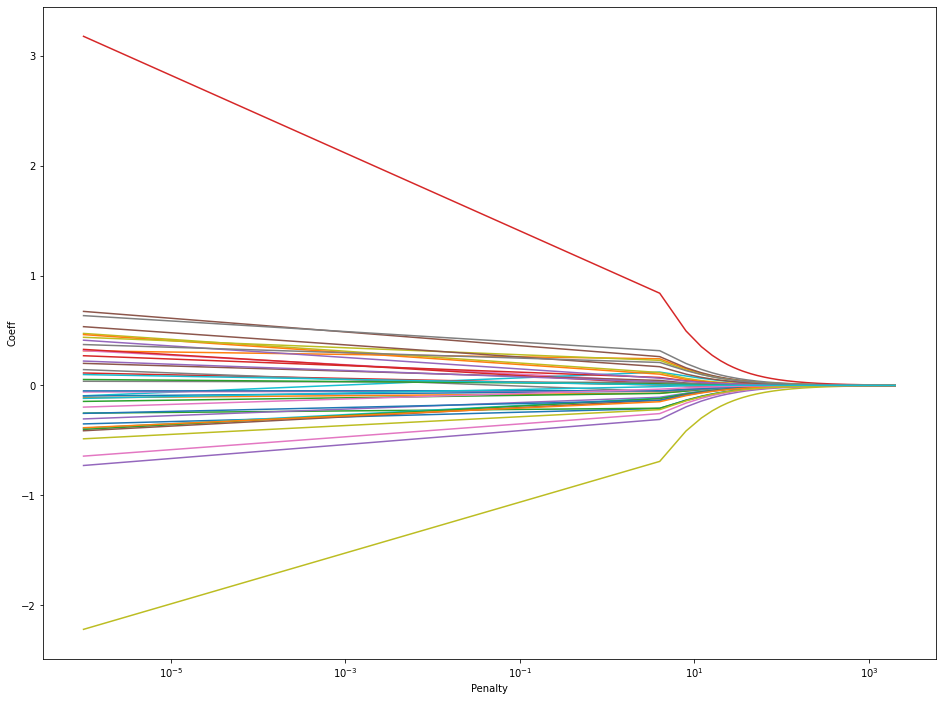

In [213]:
plot_shrinkage(alphas, np.array(coeffs)[:,1,:], limit=10)

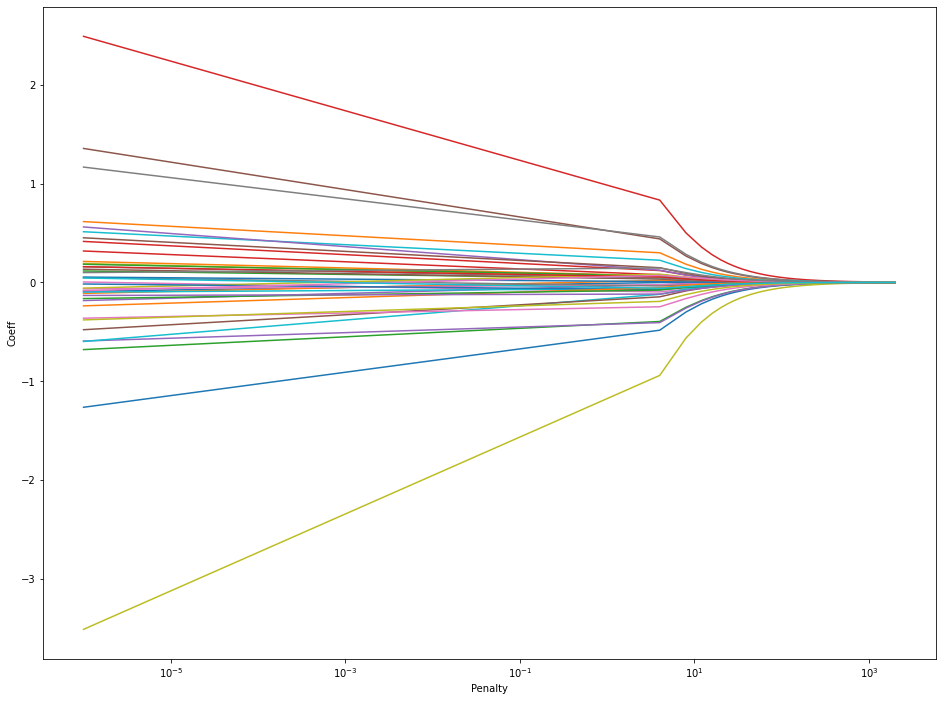

In [214]:
plot_shrinkage(alphas, np.array(coeffs)[:,2,:], limit=10)

## Elastic

In [219]:
%%time
coeffs = []
alphas = np.linspace(1e-6, 1., 500)

for alpha in alphas:
    en = ElasticNet(alpha=alpha,
                    max_iter=10_000,
                    normalize=True)
    en.fit(scaled_df, target_df_sum)
    coeffs.append(en.coef_)

CPU times: user 44.6 s, sys: 6.41 s, total: 51 s
Wall time: 34.3 s


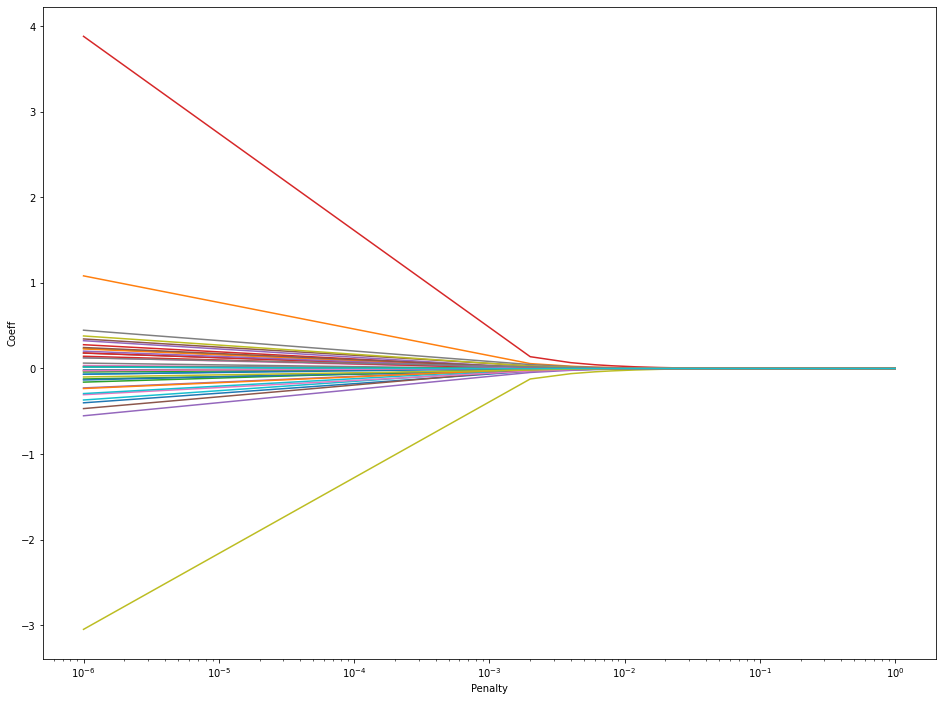

In [220]:
plot_shrinkage(alphas, np.array(coeffs)[:,0,:])

## Compare

In [221]:
from sklearn.feature_selection import RFE

In [222]:
def do_rfe_with_cv(regressor, X, y):
    rfe = RFE(estimator=regressor, step=1, n_features_to_select=10)
    rfe = rfe.fit(X, y)
    return rfe

In [231]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target_df_sum.values, test_size=.2, random_state=727)

In [224]:
def get_explanining_variables(selector, original_feature_columns, X_test, y_test):
    return sorted(original_feature_columns[selector.support_].values.tolist()),\
           selector.score(X_test, y_test),\
           selector.predict(X_test)

In [234]:
exp_lasso, lasso_test_score, lasso_preds = get_explanining_variables(
    do_rfe_with_cv(LassoCV(cv=5, normalize=True), X_train, y_train[:,0]),
    df.columns[:-1], X_test, y_test[:,0])

exp_ridge, ridge_test_score, ridge_preds = get_explanining_variables(
    do_rfe_with_cv(RidgeCV(cv=5, normalize=True), X_train, y_train[:,0]),
    df.columns[:-1], X_test, y_test[:,0])

exp_elastic_net, elastic_net_test_score, elastic_net_pred = get_explanining_variables(
    do_rfe_with_cv(ElasticNetCV(cv=5, normalize=True), X_train, y_train[:,0]),
    df.columns[:-1], X_test, y_test[:,0])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 174 but corresponding boolean dimension is 40

In [ ]:
explain_df = pd.DataFrame(columns=["model"] + ['var%d' % i for i in range(1, 11)] + ["test_score"])

# Decision Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [349]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df.values,
                                                train_size=0.8,
                                               random_state=727)

## Classify

In [365]:
dtc = DecisionTreeClassifier(random_state=727)
dtc.fit(scaled_df, target_df)

DecisionTreeClassifier(random_state=727)

In [366]:
dtc.feature_importances_

array([0.04147063, 0.04825227, 0.04604441, 0.10499636, 0.04360293,
       0.04108796, 0.04404893, 0.04238339, 0.05080198, 0.05024896,
       0.01016856, 0.01491471, 0.00759493, 0.00687474, 0.01270138,
       0.00301336, 0.00510601, 0.01037642, 0.00407609, 0.00647016,
       0.00505076, 0.00642627, 0.01122756, 0.01283066, 0.00811131,
       0.00415947, 0.02712946, 0.0303312 , 0.01419587, 0.01402703,
       0.07386587, 0.01307457, 0.01267053, 0.0116396 , 0.03095902,
       0.03306837, 0.02086916, 0.01339513, 0.00864426, 0.05408973])

In [367]:
importances = pd.DataFrame(data=[dtc.feature_importances_], columns=scaled_df.columns)
importances = importances.T.sort_values(by=[0],ascending=False).T
importances

TIPI4       age  familysize     TIPI9    TIPI10     TIPI2     TIPI3  \
0  0.104996  0.073866     0.05409  0.050802  0.050249  0.048252  0.046044   

      TIPI7     TIPI5     TIPI8  ...     VCL15      VCL3      VCL4    VCL10  \
0  0.044049  0.043603  0.042383  ...  0.008111  0.007595  0.006875  0.00647   

      VCL12      VCL7     VCL11     VCL16      VCL9      VCL6  
0  0.006426  0.005106  0.005051  0.004159  0.004076  0.003013  

[1 rows x 40 columns]

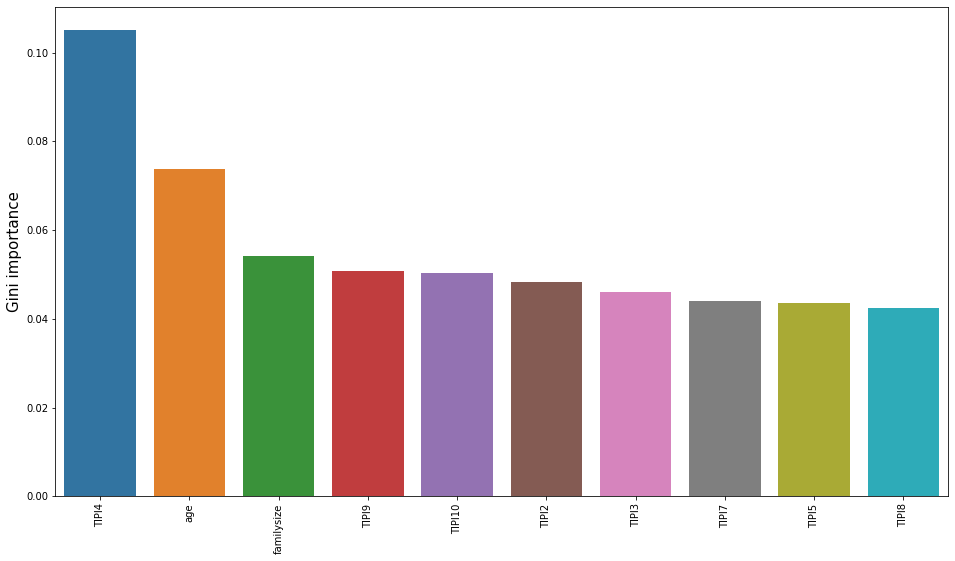

In [368]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=np.arange(0,len(importances.iloc[0][:10]),1),y=importances.iloc[0][:10])
ax.set_ylabel(ylabel='Gini importance', fontsize=15)
ax.set_xticklabels(importances.columns[:10], rotation=90, fontsize=10)
plt.show()

In [114]:
dtc = DecisionTreeClassifier(random_state=727)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=727)

In [115]:
y_preddtc = dtc.predict(X_test)

In [116]:
y_test[:,0]

array([1, 3, 3, ..., 4, 2, 4])

Text(0.5, 103.73999999999997, 'Predicted')

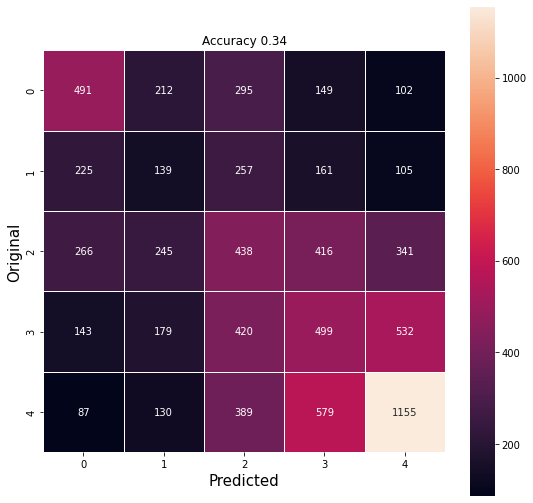

In [120]:
idx=0
cm = confusion_matrix(y_test[:,idx], y_preddtc[:,idx])
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True)
plt.title('Accuracy %.2f' % float(sum(np.around(y_preddtc[:,idx])==y_test[:,idx])/len(y_test[:,idx])))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

Text(0.5, 103.73999999999997, 'Predicted')

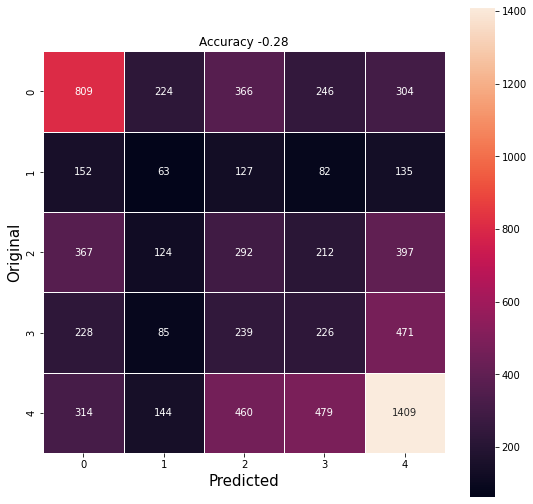

In [350]:
idx=1
cm = confusion_matrix(y_test[:,idx], y_preddtc[:,idx])
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True)
#plt.title('Accuracy %.2f' % float(sum(np.around(y_preddtc[:,idx])==y_test[:,idx])/len(y_test[:,idx])))
plt.title('Accuracy %.2f' % float(r2_score(y_test[:,idx], y_preddtc[:,idx])))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

Text(0.5, 103.73999999999997, 'Predicted')

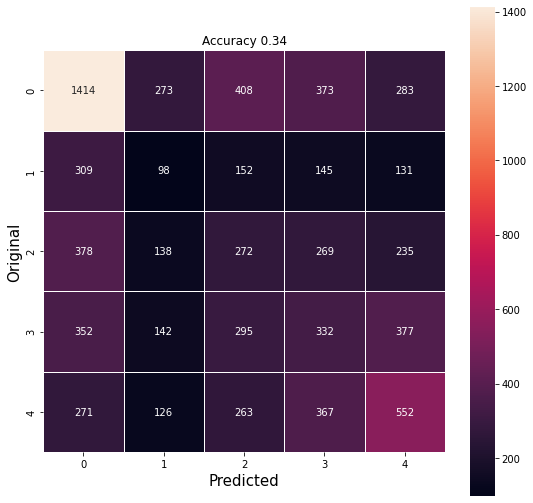

In [119]:
idx=2
cm = confusion_matrix(y_test[:,idx], y_preddtc[:,idx])
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True)
plt.title('Accuracy %.2f' % float(sum(np.around(y_preddtc[:,idx])==y_test[:,idx])/len(y_test[:,idx])))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

## Regress

In [370]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df_sum.values,
                                                train_size=0.8,
                                               random_state=727)

In [371]:
dtc_R = DecisionTreeRegressor(random_state=727)
dtc_R.fit(scaled_df, target_df_sum)

DecisionTreeRegressor(random_state=727)

In [372]:
importances = pd.DataFrame(data=[dtc_R.feature_importances_], columns=scaled_df.columns)
importances = importances.T.sort_values(by=[0],ascending=False).T
importances

TIPI4     TIPI9       age  familysize     TIPI2     TIPI8     TIPI1  \
0  0.277283  0.096801  0.059379    0.037235  0.037233  0.036694  0.035731   

      TIPI6     TIPI3    TIPI10  ...      VCL1     VCL15     VCL12      VCL4  \
0  0.035551  0.034498  0.033821  ...  0.005735  0.005263  0.005168  0.004963   

      VCL10      VCL9     VCL16      VCL7     VCL11     VCL6  
0  0.004633  0.004576  0.004332  0.003874  0.003648  0.00326  

[1 rows x 40 columns]

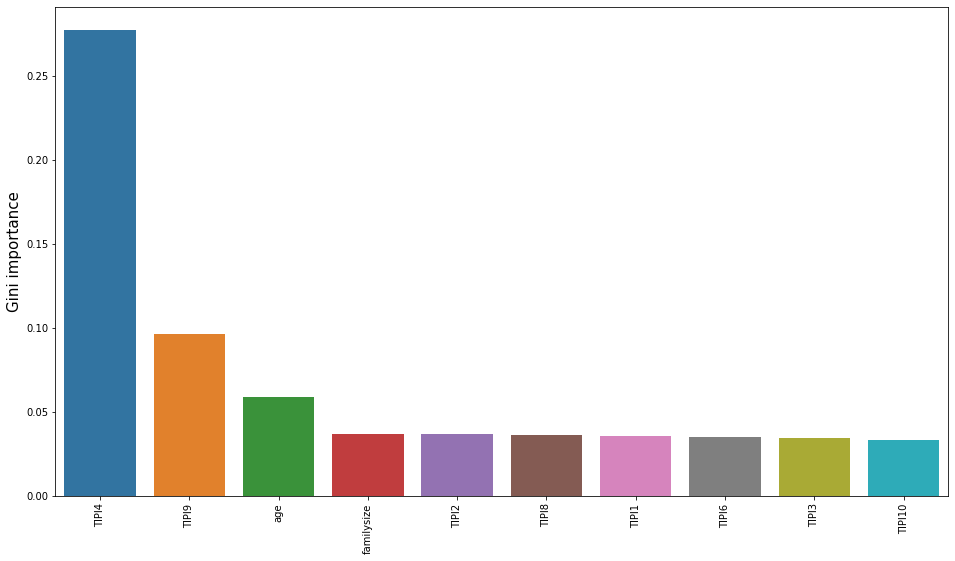

In [373]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=np.arange(0,len(importances.iloc[0][:10]),1),y=importances.iloc[0][:10])
ax.set_ylabel(ylabel='Gini importance', fontsize=15)
ax.set_xticklabels(importances.columns[:10], rotation=90, fontsize=10)
plt.show()

In [126]:
dtc_R = DecisionTreeRegressor(random_state=727)
dtc_R.fit(X_train, y_train)

DecisionTreeRegressor(random_state=727)

In [127]:
y_preddtc_R = dtc_R.predict(X_test)

Text(0, 0.5, 'Predicted')

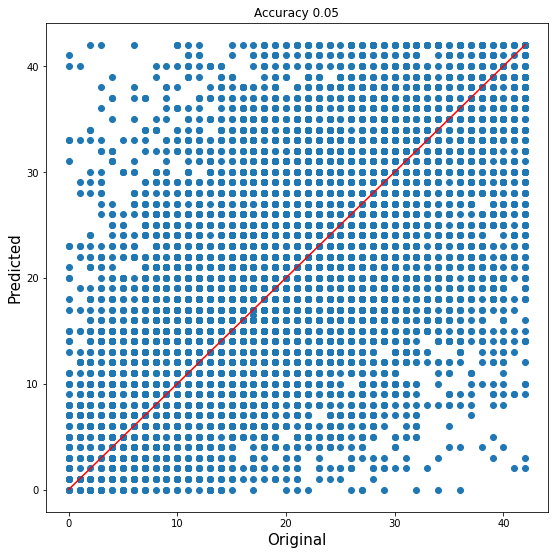

In [132]:
idx=0
#cm = confusion_matrix(y_test[:,idx], y_preddtc_R[:,idx])
plt.figure(figsize=(9,9))
plt.scatter(y_test[:,idx], y_preddtc_R[:,idx])
plt.plot([0,y_preddtc_R[:,idx].max()],[0,y_preddtc_R[:,idx].max()],'r')
plt.title('Accuracy %.2f' % float(sum(np.around(y_preddtc_R[:,idx])==y_test[:,idx])/len(y_test[:,idx])))
plt.xlabel('Original',fontsize=15)
plt.ylabel('Predicted',fontsize=15)

Text(0, 0.5, 'Predicted')

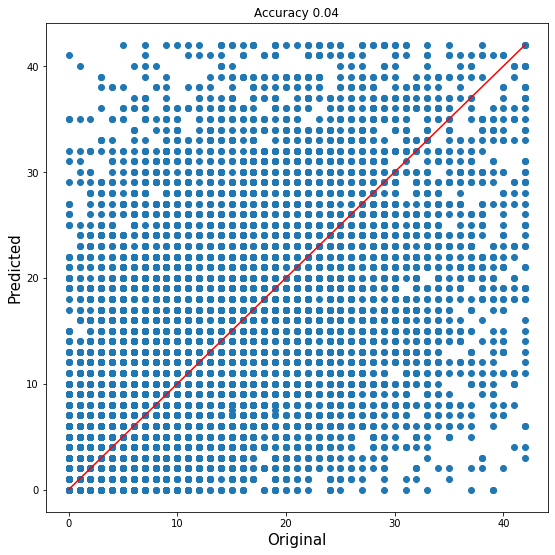

In [135]:
idx=1
#cm = confusion_matrix(y_test[:,idx], y_preddtc_R[:,idx])
plt.figure(figsize=(9,9))
plt.scatter(y_test[:,idx], y_preddtc_R[:,idx])
plt.plot([0,y_preddtc_R[:,idx].max()],[0,y_preddtc_R[:,idx].max()],'r')
plt.title('Accuracy %.2f' % float(sum(np.around(y_preddtc_R[:,idx])==y_test[:,idx])/len(y_test[:,idx])))
plt.xlabel('Original',fontsize=15)
plt.ylabel('Predicted',fontsize=15)

Text(0, 0.5, 'Predicted')

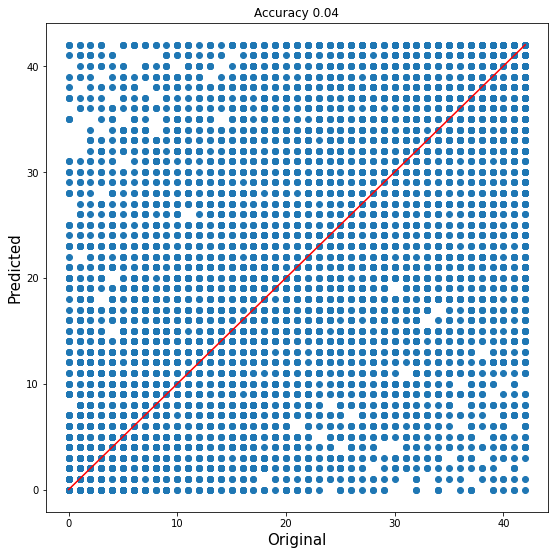

In [136]:
idx=2
#cm = confusion_matrix(y_test[:,idx], y_preddtc_R[:,idx])
plt.figure(figsize=(9,9))
plt.scatter(y_test[:,idx], y_preddtc_R[:,idx])
plt.plot([0,y_preddtc_R[:,idx].max()],[0,y_preddtc_R[:,idx].max()],'r')
plt.title('Accuracy %.2f' % float(sum(np.around(y_preddtc_R[:,idx])==y_test[:,idx])/len(y_test[:,idx])))
plt.xlabel('Original',fontsize=15)
plt.ylabel('Predicted',fontsize=15)

# K-nn 

In [137]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [138]:
def doKnn(data, target, ts, rs=None):
    X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    train_size=ts,
                                                   random_state=rs)
    knn= KNeighborsRegressor(20, weights="uniform")
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_test)
    print("Accuracy of built-in KNN regression: ", sum(np.around(y_pred1)==y_test)/len(y_test))
    print('R2 score: ', r2_score(y_test, y_pred1))
    plt.plot(y_test, y_pred1, ".")
    plt.xlabel("y_test")
    plt.ylabel("y_pred");
    #plt.plot([0,60],[0,60],'r--')
    #plt.xlim(5,60)
    #plt.ylim(5,60)
    plt.show()
    knn= KNeighborsRegressor(20, weights="distance")
    knn.fit(X_train, y_train)
    y_pred2 = knn.predict(X_test)
    print("Accuracy of built-in weighted KNN regression: ", sum(np.around(y_pred2)==y_test)/len(y_test))
    print('R2 score: ', r2_score(y_test, y_pred2))
    plt.plot(y_test, y_pred2, ".")
    plt.xlabel("y_test")
    plt.ylabel("y_pred");
    #plt.plot([0,60],[0,60],'r--')
    #plt.xlim(5,60)
    #plt.ylim(5,60)
    plt.show()
    knn= KNeighborsClassifier(20, weights="uniform")
    knn.fit(X_train, y_train)
    y_pred3 = knn.predict(X_test)
    print("Accuracy of built-in KNN classifier: ", sum(np.around(y_pred3)==y_test)/len(y_test))
    print('R2 score: ', r2_score(y_test, y_pred3))
    plt.plot(y_test, y_pred3, ".", ms=15, alpha=0.2)
    plt.xlabel("y_test")
    plt.ylabel("y_pred");
    #plt.plot([0,60],[0,60],'r--')
    #plt.xlim(5,60)
    #plt.ylim(5,60)
    plt.show()
    return y_test, X_test, y_pred1, y_pred2, y_pred3

## Define the highest level

Accuracy of built-in KNN regression:  0.15160276555625393
R2 score:  -0.05099820679562628


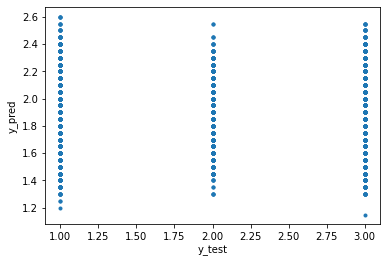

Accuracy of built-in weighted KNN regression:  0.15449402891263356
R2 score:  -0.05107390551377855


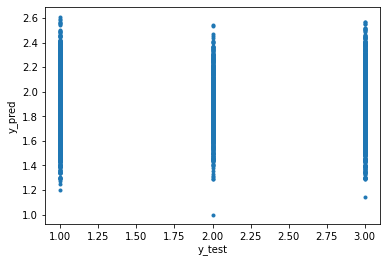

Accuracy of built-in KNN classifier:  0.45744814582023885
R2 score:  -1.0479208104459308


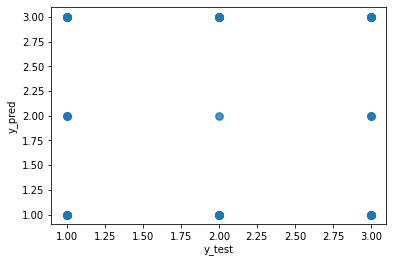

In [359]:
y_test71, x_test71, y_pred711, y_pred712, y_pred713 = doKnn(scaled_df, max_lvls, ts=0.8, rs=727)

Text(0.5, 103.73999999999997, 'Predicted')

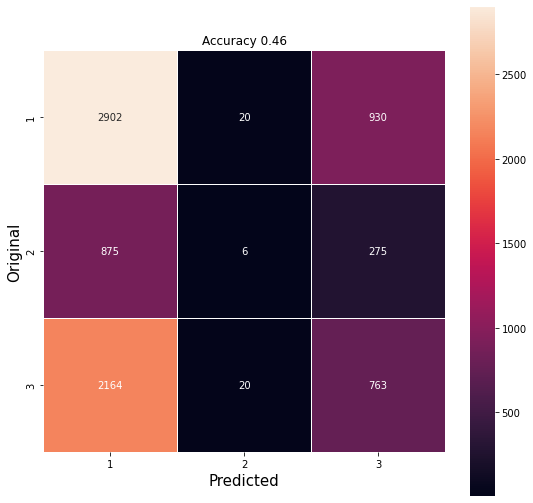

In [142]:
cm = confusion_matrix(y_test71, y_pred713)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred713)),
            yticklabels=np.unique(np.round(y_pred713)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred713)==y_test71)/len(y_test71)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

## Level of Stress

Accuracy of built-in KNN regression:  0.283218101822753
R2 score:  0.34203838446767965


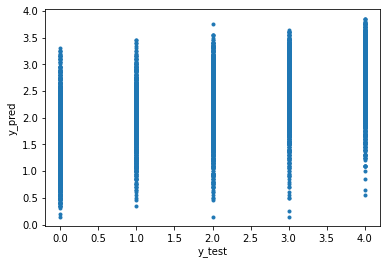

Accuracy of built-in weighted KNN regression:  0.28145820238843494
R2 score:  0.3428241514396375


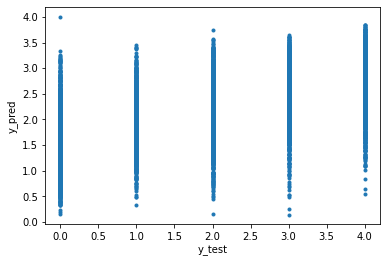

Accuracy of built-in KNN classifier:  0.37862979258328094
R2 score:  0.02373345902588253


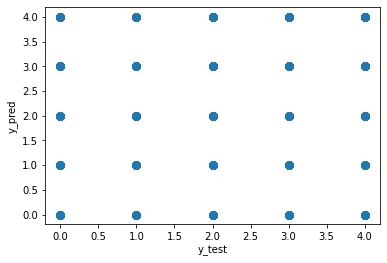

In [143]:
y_test72, x_test72, y_pred721, y_pred722, y_pred723 =doKnn(scaled_df, target_df['LVL_S'], ts=0.8, rs=727)

In [361]:
cm = confusion_matrix(y_test72, y_pred722)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred722)),
            yticklabels=np.unique(np.round(y_pred722)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred722)==y_test72)/len(y_test72)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Text(0.5, 103.73999999999997, 'Predicted')

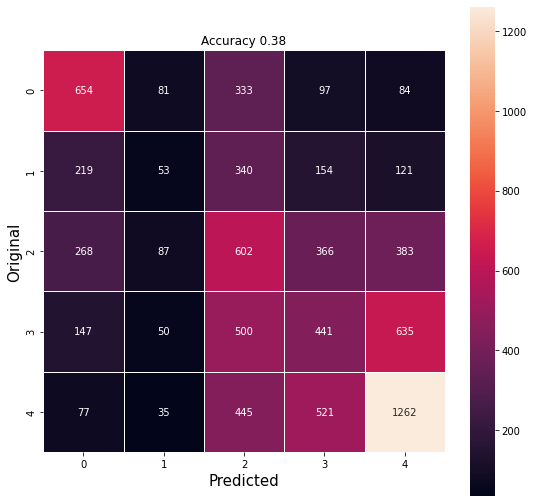

In [360]:
cm = confusion_matrix(y_test72, y_pred723)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred723)),
            yticklabels=np.unique(np.round(y_pred723)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred723)==y_test72)/len(y_test72)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

### One v. all

In [144]:
max_stress = max_lvls.copy()
max_stress[max_lvls > 1] = 0

Accuracy of built-in KNN regression:  0.5005656819610308
R2 score:  -0.0514402341927962


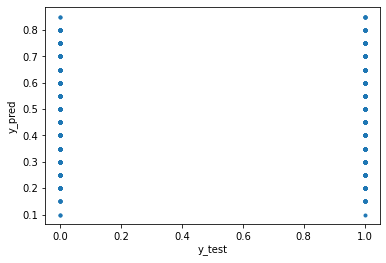

Accuracy of built-in weighted KNN regression:  0.4995600251414205
R2 score:  -0.05189396836338234


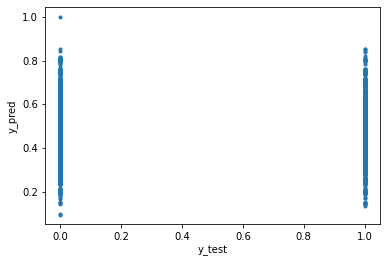

Accuracy of built-in KNN classifier:  0.5005656819610308
R2 score:  -0.9997281198140611


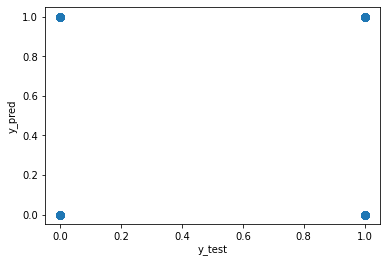

In [145]:
y_test721, x_test721, y_pred7211, y_pred7212, y_pred7213 = doKnn(scaled_df, max_stress, ts=0.8, rs=727)

## Level of Anxiety

Accuracy of built-in KNN regression:  0.1989943431803897
R2 score:  0.26672292785610274


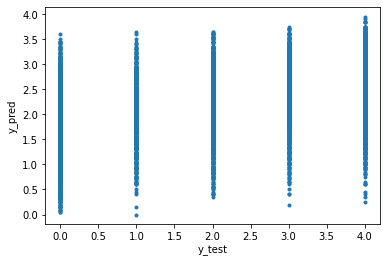

Accuracy of built-in weighted KNN regression:  0.19798868636077938
R2 score:  0.26725785711235295


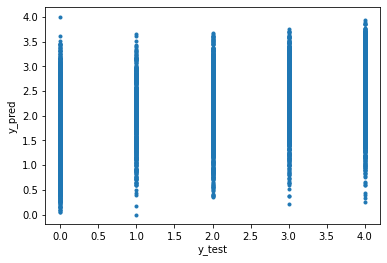

Accuracy of built-in KNN classifier:  0.44424890006285356
R2 score:  -0.2582635886476483


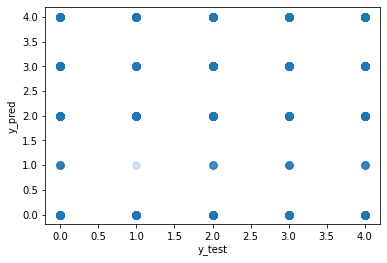

In [146]:
y_test73, x_test73, y_pred731, y_pred732, y_pred733 =doKnn(scaled_df, target_df['LVL_A'], ts=0.8, rs=727)

Text(0.5, 103.73999999999997, 'Predicted')

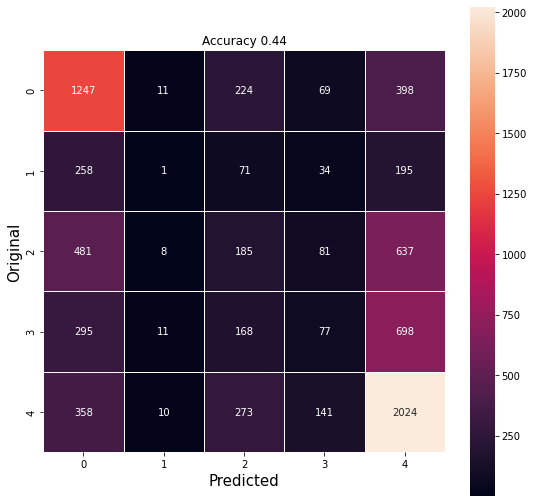

In [362]:
cm = confusion_matrix(y_test73, y_pred733)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred733)),
            yticklabels=np.unique(np.round(y_pred733)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred733)==y_test73)/len(y_test73)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

### One v. all

Accuracy of built-in KNN regression:  0.8060339409176619
R2 score:  -0.05292635073547847


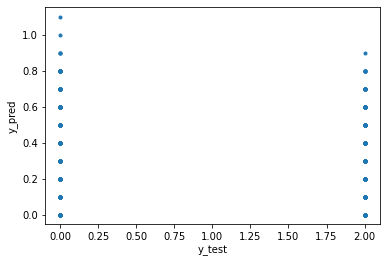

Accuracy of built-in weighted KNN regression:  0.7688246385920805
R2 score:  -0.05363832016227499


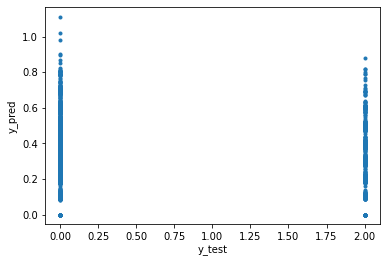

Accuracy of built-in KNN classifier:  0.8545568824638592
R2 score:  -0.1710371360331333


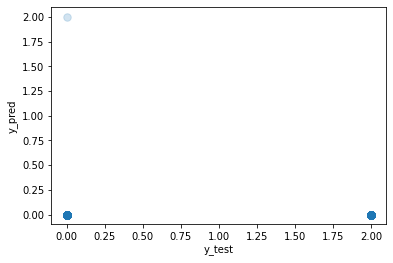

In [147]:
max_anx = max_lvls.copy()
max_anx[max_lvls != 2] = 0

y_test731, x_test731, y_pred7311, y_pred7312, y_pred7313 = doKnn(scaled_df, max_anx, ts=0.8, rs=727)

Text(0.5, 103.73999999999997, 'Predicted')

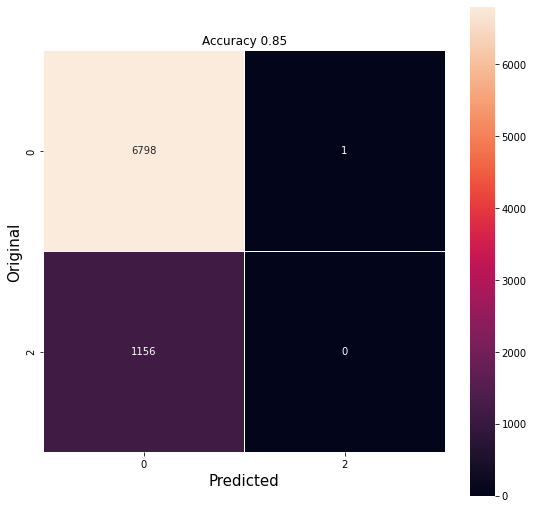

In [148]:
cm = confusion_matrix(y_test731, y_pred7313)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred7313)),
            yticklabels=np.unique(np.round(y_pred7313)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred7313)==y_test731)/len(y_test731)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

## Level of Depression

Accuracy of built-in KNN regression:  0.1988686360779384
R2 score:  0.23942087370173104


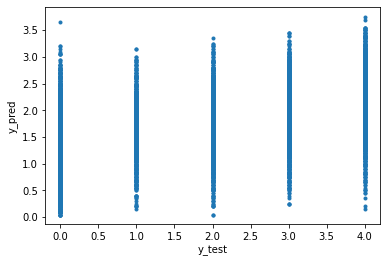

Accuracy of built-in weighted KNN regression:  0.19748585795097423
R2 score:  0.23964284975860517


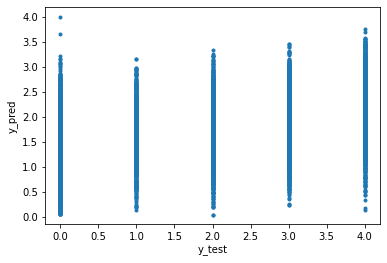

Accuracy of built-in KNN classifier:  0.40842237586423635
R2 score:  -0.3664264790069047


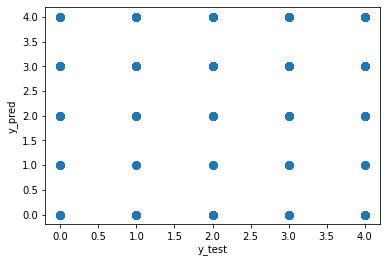

In [149]:
y_test74, x_test74, y_pred741, y_pred742, y_pred743=doKnn(scaled_df, target_df['LVL_D'], ts=0.8, rs=727)

Text(0.5, 103.73999999999997, 'Predicted')

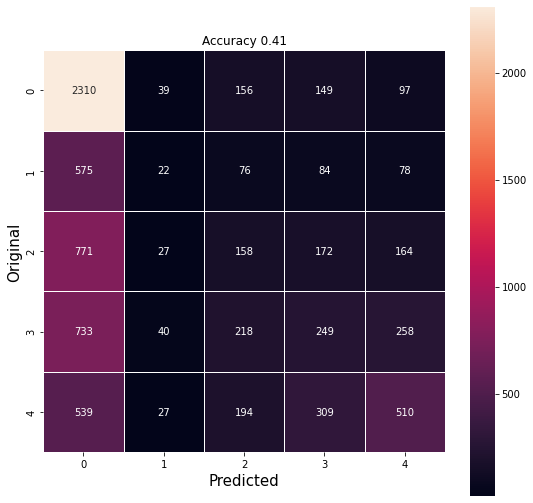

In [363]:
cm = confusion_matrix(y_test74, y_pred743)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred743)),
            yticklabels=np.unique(np.round(y_pred743)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred743)==y_test74)/len(y_test74)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

### One v. all

Accuracy of built-in KNN regression:  0.018730358265241987
R2 score:  -0.044889811862607765


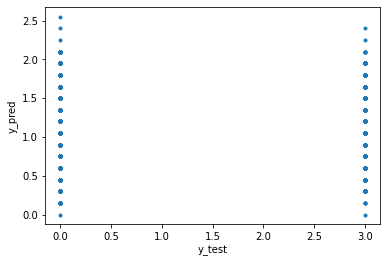

Accuracy of built-in weighted KNN regression:  0.018856065367693273
R2 score:  -0.04460696875800174


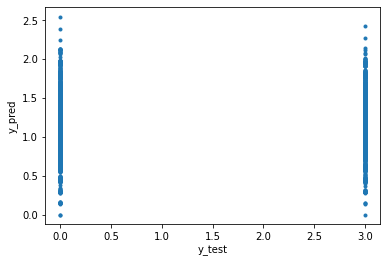

Accuracy of built-in KNN classifier:  0.6095537397862979
R2 score:  -0.6741608404496477


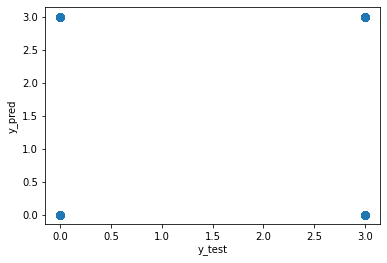

In [150]:
max_depr = max_lvls.copy()
max_depr[max_lvls != 3] = 0

y_test741, x_test741, y_pred7411, y_pred7412, y_pred7413 = doKnn(scaled_df, max_depr, ts=0.8, rs=727)

Text(0.5, 103.73999999999997, 'Predicted')

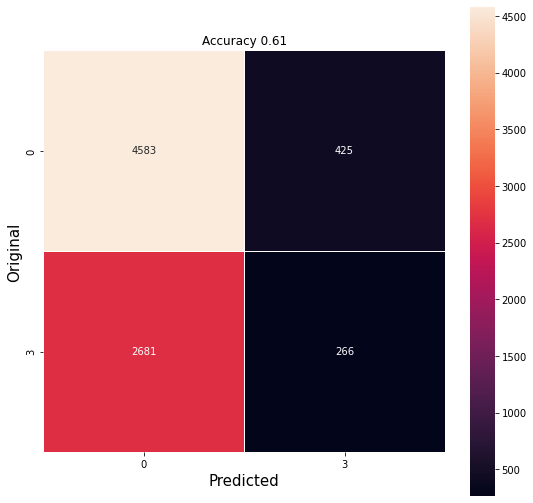

In [152]:
cm = confusion_matrix(y_test741, y_pred7413)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred7413)),
            yticklabels=np.unique(np.round(y_pred7413)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred7413)==y_test741)/len(y_test741)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

# Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

-0.29542497324891315


Text(0.5, 103.73999999999997, 'Predicted')

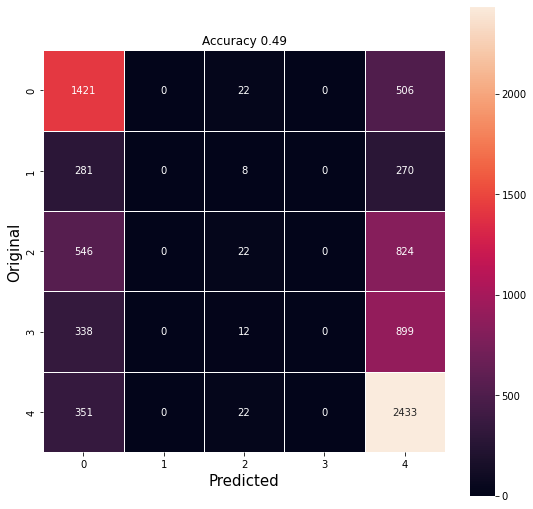

In [356]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df['LVL_A'].values,
                                                train_size=0.8,
                                               random_state=727)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
multi_preds = logreg.predict(X_test)
multi_preds_probas = logreg.predict_proba(X_test)

cm = confusion_matrix(y_test, multi_preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_test)),
            yticklabels=np.unique(np.round(y_test)))
plt.title('Accuracy %.2f' % float(sum(np.around(multi_preds)==y_test)/len(y_test)))
print(r2_score(y_test, multi_preds))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

In [357]:
np.unique(y_test)

array([0, 1, 2, 3, 4])

0.1237159869654586


Text(0.5, 103.73999999999997, 'Predicted')

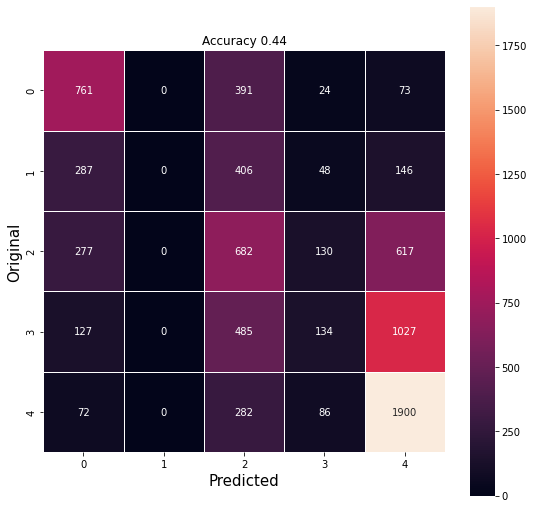

In [159]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df['LVL_S'].values,
                                                train_size=0.8,
                                               random_state=727)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
multi_preds = logreg.predict(X_test)
multi_preds_probas = logreg.predict_proba(X_test)

cm = confusion_matrix(y_test, multi_preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_test)),
            yticklabels=np.unique(np.round(y_test)))
plt.title('Accuracy %.2f' % float(sum(np.around(multi_preds)==y_test)/len(y_test)))
print(r2_score(y_test, multi_preds))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

-0.38238686262153276


Text(0.5, 103.73999999999997, 'Predicted')

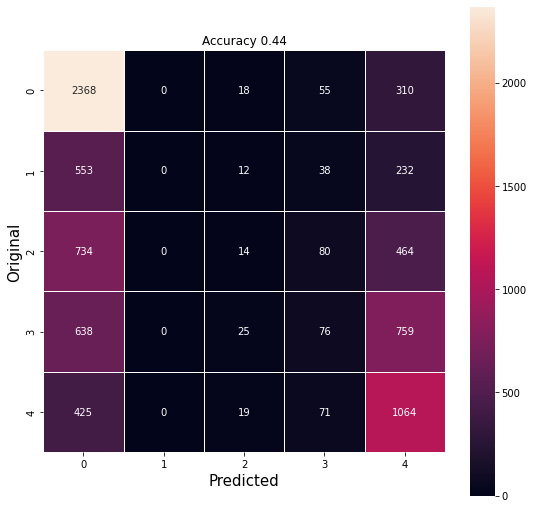

In [351]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df['LVL_D'].values,
                                                train_size=0.8,
                                               random_state=727)

logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train, y_train)
multi_preds = logreg.predict(X_test)
multi_preds_probas = logreg.predict_proba(X_test)

cm = confusion_matrix(y_test, multi_preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_test)),
            yticklabels=np.unique(np.round(y_test)))
plt.title('Accuracy %.2f' % float(sum(np.around(multi_preds)==y_test)/len(y_test)))
print(r2_score(y_test, multi_preds))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)